In [1]:
from metabolinks import align, read_aligned_spectra, read_spectra_from_xcel
from metabolinks.similarity import mz_similarity
#This and another later warning appears since I messed up my package versions in anaconda. It doesn't affect anything here.

### Similarity analysis with 2nd data used being the following peak alignment: 
#### 1st alignment: min_sample = 2, 2nd alignment: min_sample = 1 - NAME: 2-1 (SPECIAL CASE)
##### 1st alignment made with 2 replicates of each variety (between varieties) where a feature must be present in both and 2nd alignment with all samples (including the ones excluded before) with no feature requirement

All further changes to code will first be implemented on the original similarity_analysis. This is an altered version of said original.

Coloured labels in dendrograms that have the 39 samples.

## Similarity analysis
aligned_all_neg = negative dataset alignment 2-1 (Original) / aligned_neg - binary matrix equivalent

aligned_all_pos = positive dataset alignment 2-1 (Original) / aligned_pos - binary matrix equivalent

aligned_all_neg2 = negative dataset alignment 2-1 (Special) / aligned_neg2 - binary matrix equivalent

aligned_all_pos2 = positive dataset alignment 2-1 (Special) / aligned_pos2 - binary matrix equivalent

#### Read aligned data, using peaks that appear in at least 2 samples

In [2]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min2_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min2_1ppm_negative.csv', labels=True, sep=',')
#print('------ positive mode aligned --------------')
#print(aligned_all_pos.info())
#print('------ negative mode aligned --------------')
#print(aligned_all_neg.info())

#### Compute m/z similarities

In [3]:
sim_pos = mz_similarity(aligned_all_pos)
sim_neg = mz_similarity(aligned_all_neg)

In [4]:
print(sim_pos)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10    23  ...    34  \
14       330  277  253  202  200  195  207  214  207   152  ...   175   
15       277  379  302  233  232  224  227  231  223   179  ...   201   
16       253  302  355  222  222  218  212  212  208   164  ...   189   
29       202  233  222  667  514  526  230  233  235   308  ...   351   
30       200  232  222  514  612  471  236  236  235   284  ...   326   
31       195  224  218  526  471  624  232  237  239   294  ...   338   
8        207  227  212  230  236  232  489  399  369   182  ...   205   
9        214  231  212  233  236  237  399  501  381   184  ...   218   
10       207  223  208  235  235  239  369  381  471   181  ...   221   
23       152  179  164  308  284  294  182  184  181  1487  ...   431   
24       151  176  162  308  286  297  187  190  188  1246  ...   443   
25       146  174  159  296  269  286  177  179  180  1095  ...   429   
38      

In [5]:
print(sim_neg)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10   23  ...   34  10713-1  \
14       442  286  345  186  183  170  168  179  179   34  ...  151        6   
15       286  319  222  121  118  108  144  157  155   25  ...  146        4   
16       345  222  378  174  171  159  168  181  177   34  ...  148        4   
29       186  121  174  674  637  588  143  151  150   88  ...  202       16   
30       183  118  171  637  677  591  142  150  149   88  ...  214       22   
31       170  108  159  588  591  628  128  135  135   87  ...  184       22   
8        168  144  168  143  142  128  370  331  339  118  ...  131        4   
9        179  157  181  151  150  135  331  402  371  111  ...  138        4   
10       179  155  177  150  149  135  339  371  410  120  ...  138        4   
23        34   25   34   88   88   87  118  111  120  350  ...   23       10   
24        46   33   45   95   95   94  127  121  129  314  ...   30       10 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import pandas as pd

In [7]:
dfpos = pd.DataFrame(sim_pos.sample_similarity_jaccard,
                     columns=sim_pos.sample_names,
                     index=sim_pos.sample_names)

dfneg = pd.DataFrame(sim_neg.sample_similarity_jaccard,
                     columns=sim_neg.sample_names,
                     index=sim_neg.sample_names)

Sample similarity, positive mode


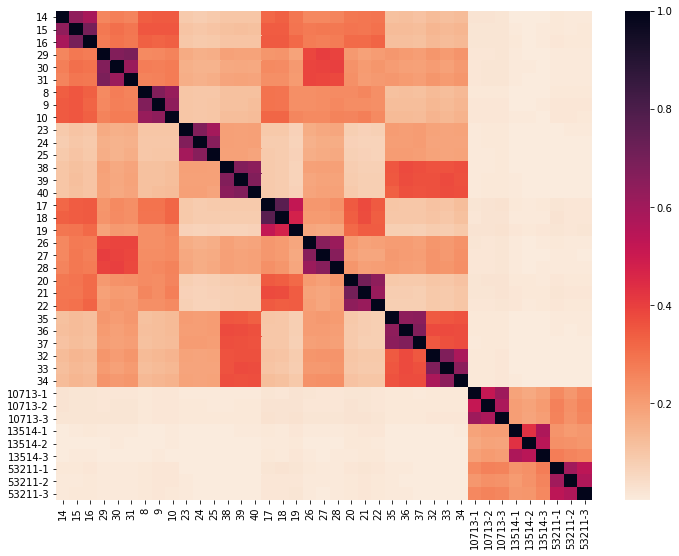

In [8]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, positive mode')
hm = sns.heatmap(dfpos, annot=False, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Sample similarity, negative mode


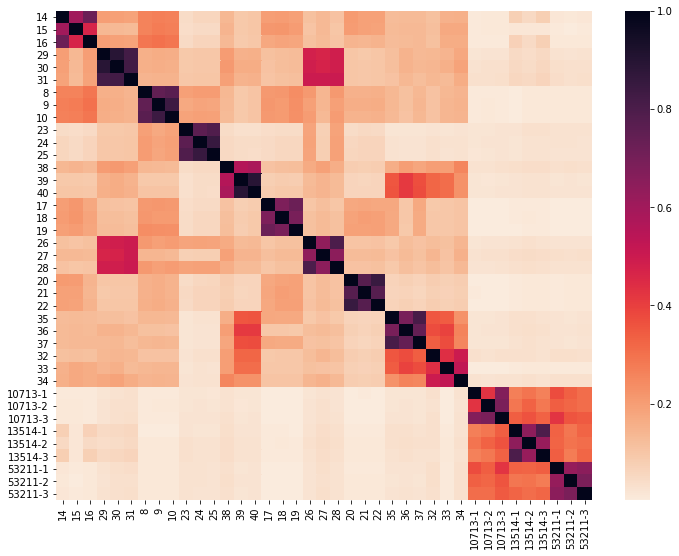

In [9]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, negative mode')
hm = sns.heatmap(dfneg, annot=False, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [10]:
dfpos = pd.DataFrame(sim_pos.label_similarity_jaccard,
                     columns=sim_pos.unique_labels,
                     index=sim_pos.unique_labels)

dfneg = pd.DataFrame(sim_neg.label_similarity_jaccard,
                     columns=sim_neg.unique_labels,
                     index=sim_neg.unique_labels)

Label similarity, positive mode


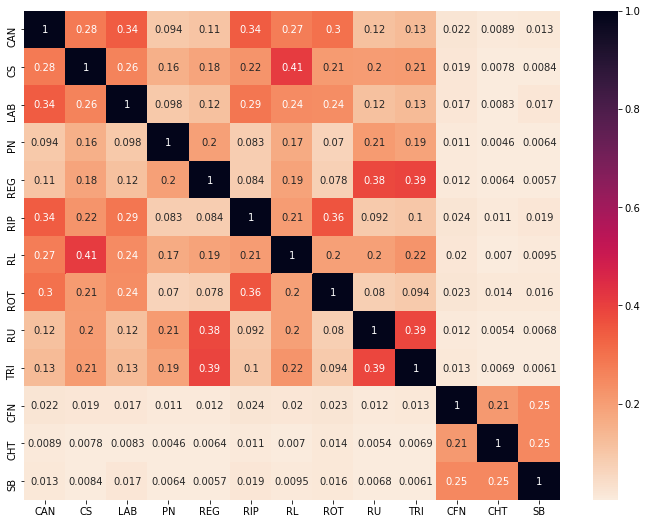

In [11]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, positive mode')
hm = sns.heatmap(dfpos, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Label similarity, negative mode


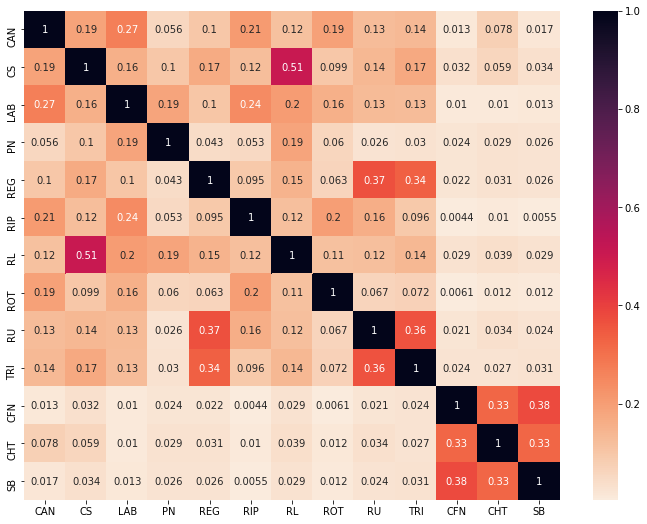

In [12]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, negative mode')
hm = sns.heatmap(dfneg, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Doing... Experiments with scipy functions...

In [13]:
import scipy.spatial.distance as dist
import scipy.cluster.hierarchy as hier

In [14]:
def df_to_bool(df):
    "Transforms data into 'binary' matrices."
    df = df.copy()
    df[df.notnull()] = 1
    df[df.isnull()] = 0
    return df
aligned_01 = df_to_bool(aligned_all_neg.data)
# confirm it is 0's and 1's
#aligned_01

In [15]:
jdist = dist.pdist(aligned_01.T, metric='jaccard')
print(dist.squareform(jdist))
print('------------------------------------')
sim = mz_similarity(aligned_all_neg)
jsim = sim.sample_similarity_jaccard
jdist = 1 - jsim
print(jdist)

[[0.         0.39789474 0.27368421 ... 0.98458904 0.98819562 0.98148148]
 [0.39789474 0.         0.53263158 ... 0.98924731 0.99367089 0.98951782]
 [0.27368421 0.53263158 0.         ... 0.98852772 0.98867925 0.98499062]
 ...
 [0.98458904 0.98924731 0.98852772 ... 0.         0.37368421 0.34736842]
 [0.98819562 0.99367089 0.98867925 ... 0.37368421 0.         0.31052632]
 [0.98148148 0.98951782 0.98499062 ... 0.34736842 0.31052632 0.        ]]
------------------------------------
[[0.         0.39789474 0.27368421 ... 0.98458904 0.98819562 0.98148148]
 [0.39789474 0.         0.53263158 ... 0.98924731 0.99367089 0.98951782]
 [0.27368421 0.53263158 0.         ... 0.98852772 0.98867925 0.98499062]
 ...
 [0.98458904 0.98924731 0.98852772 ... 0.         0.37368421 0.34736842]
 [0.98819562 0.99367089 0.98867925 ... 0.37368421 0.         0.31052632]
 [0.98148148 0.98951782 0.98499062 ... 0.34736842 0.31052632 0.        ]]


## Wrapping up in a function...

In [16]:
def clustermap_peak_list(aligned):
    aligned_01 = aligned.data.copy()
    aligned_01[aligned_01.notnull()] = 1
    aligned_01[aligned_01.isnull()] = 0
    
    ulabels = aligned.unique_labels()
    n = len(ulabels)
    
    p = sns.color_palette() + sns.color_palette("Set1", n_colors=n-10, desat=.5)
    sample_to_labels = pd.Series(aligned.labels, index=aligned.sample_names)
    label_colors = pd.Series(p, index=ulabels)
    sample_colors = sample_to_labels.map(label_colors)
    
    g = sns.clustermap(aligned_01, metric="jaccard", figsize=(15, 20), 
                       row_cluster=False,
                       col_colors=sample_colors,
                       yticklabels=False)
    # fix bug in seaborn, error in clustermap if cbar == False
    ax=g.cax; aax=ax.clear(); aax = ax.axis('off'); 

    # draw legend
    lpatches = [mpatches.Patch(color=c, label=lbl) for (lbl, c) in label_colors.iteritems()]
    leg = plt.legend(handles=lpatches, fontsize=20)
    return g
    

Sample HC, NEGATIVE mode


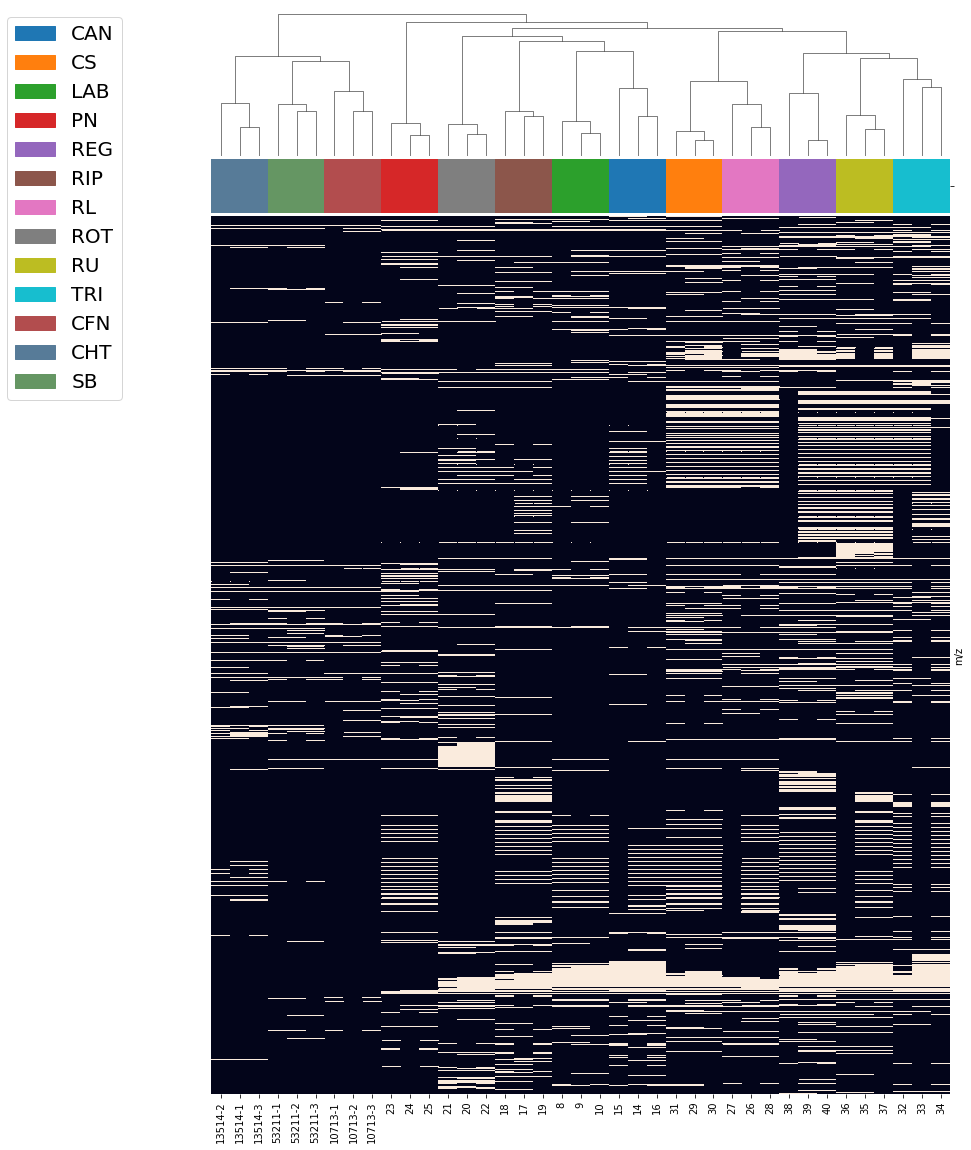

In [17]:
print('Sample HC, NEGATIVE mode')
g = clustermap_peak_list(aligned_all_neg)
g.savefig('sampleHC_negative.pdf')


Sample HC, POSITIVE mode


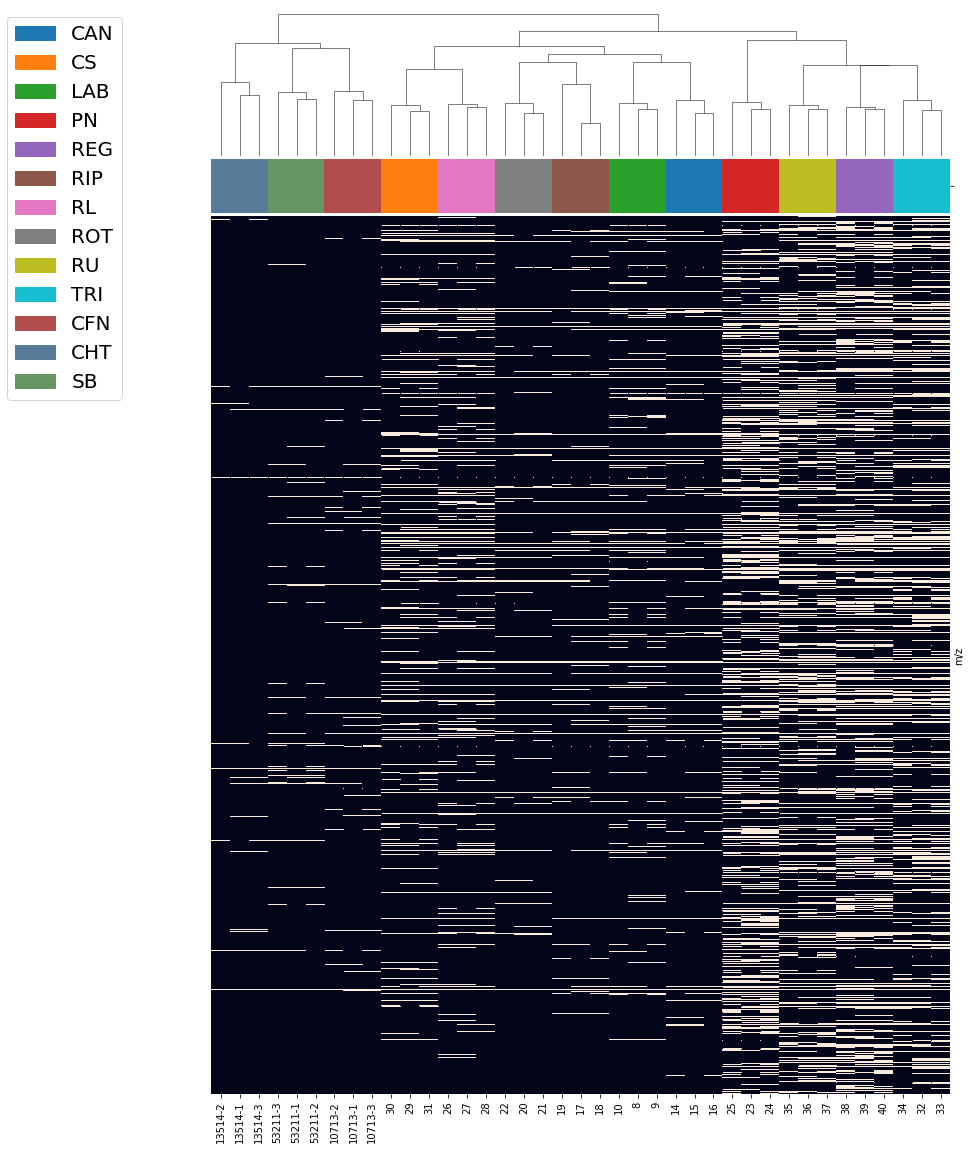

In [18]:
print('Sample HC, POSITIVE mode')
g = clustermap_peak_list(aligned_all_pos)
g.savefig('sampleHC_positive.pdf')

Cultivar dendogram, Jaccard distance, NEGATIVE MODE


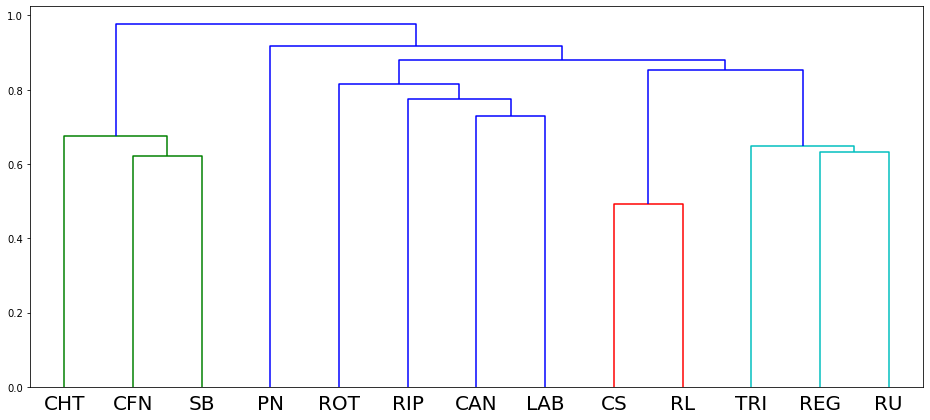

In [19]:
print('Cultivar dendogram, Jaccard distance, NEGATIVE MODE')
jdist = dist.squareform(1 - sim_neg.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_neg.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_negative.pdf')

In [20]:
print(hier.cophenet(Z,jdist)[0])

0.9602064578870853


Cultivar dendogram, Jaccard distance, POSITIVE MODE


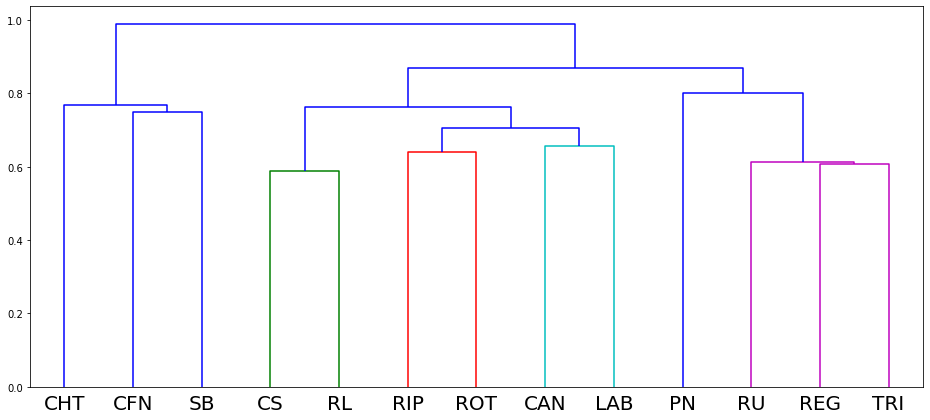

In [21]:
print('Cultivar dendogram, Jaccard distance, POSITIVE MODE')
jdist = dist.squareform(1 - sim_pos.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_pos.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_positive.pdf')

In [22]:
print(hier.cophenet(Z,jdist)[0])

0.9685118072327326


### Other Binary Similarity Analysis Methods

In [23]:
aligned_neg = df_to_bool(aligned_all_neg.data)
aligned_pos = df_to_bool(aligned_all_pos.data)

Creating the colours label for all dendrograms (negative and positive have the same labels):

In [24]:
label_colors = {}
colours = cm.get_cmap('nipy_spectral', 13)
col_lbl = colours(range(13))
for i in range(len(col_lbl)):
    label_colors[aligned_all_neg.labels[3*i]] = col_lbl[i]

Cultivar dendogram, Binary methods, NEGATIVE MODE


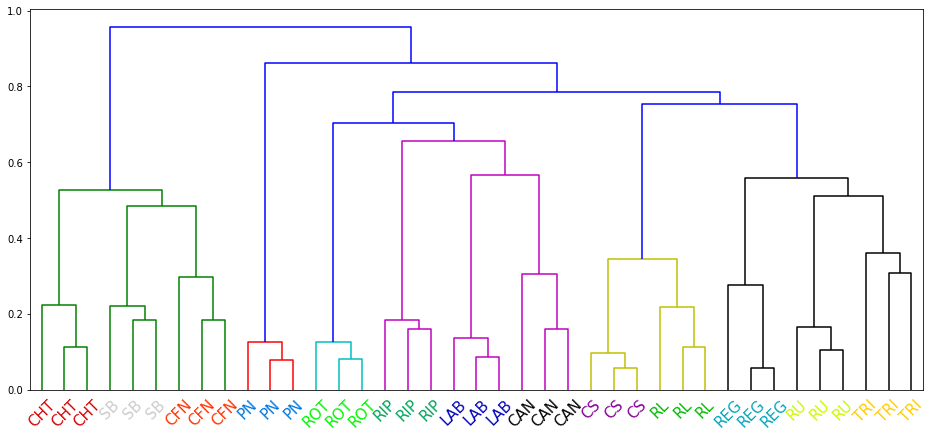

In [25]:
#Apply one of the following:
#dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule
#kulsinski, rusellrao

print('Cultivar dendogram, Binary methods, NEGATIVE MODE')
Zdice_neg = hier.linkage(aligned_neg.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_neg, labels=aligned_all_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

Cultivar dendogram, Binary methods, POSITIVE MODE


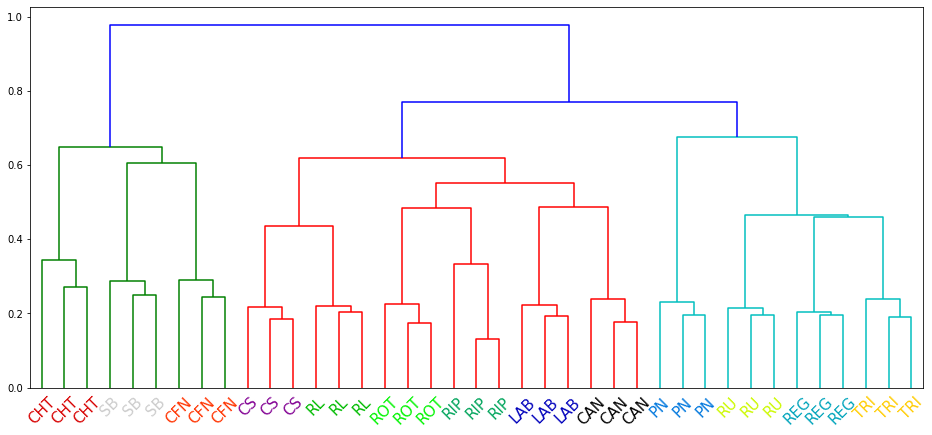

In [26]:
print('Cultivar dendogram, Binary methods, POSITIVE MODE')
Zdice_pos = hier.linkage(aligned_pos.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_pos, labels=aligned_all_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

### Non-binary Similarity Analysis

All samples need to have missing value imputation (removing features is optional) with the function NaN_Imputation of scaling.py (replace missing features with half of the minimum intensity of the full dataset).

After that, the rest of the data processing can vary where 3 different processing emthods were applied in different combinations:

##### Normalization by a references feature (Norm_feat from scaling.py) - N;
##### Glog transformation/ log2 transformation (glog from scaling.py) - G;
##### Pareto Scaling (ParetoScal from scaling.py) - P.
Three combinations were used and compared: 1) Only Pareto Scaling (P), Normalization by a reference feature and Pareto Scaling (NP) and Normalization by a reference feature, glog transformation and Pareto Scaling (NGP).

In [27]:
import scaling as sca
import numpy as np

#### Negative Mode - Original peak alignment

3 types of processing:

Euc_P_neg - Missing Value Imputation and Pareto Scaling.

Euc_NP_neg - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_NGP_neg - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [28]:
#Euc_P_neg
Imputated_neg = sca.NaN_Imputation(aligned_all_neg, 0)
Euc_P_neg = sca.ParetoScal(Imputated_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation and Pareto Scaling


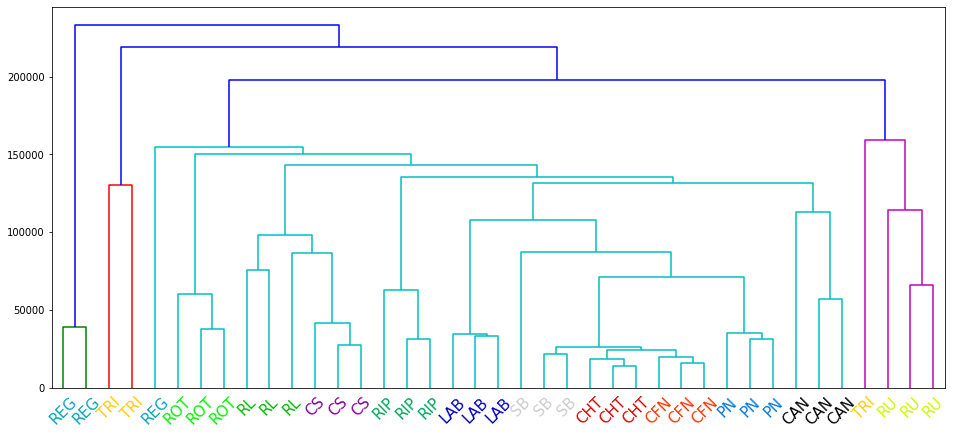

In [29]:
#Measure Euclidean distances
dist_euc_P_neg = dist.pdist(Euc_P_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation and Pareto Scaling')
Z_euc_P_neg = hier.linkage(dist_euc_P_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_P_neg, labels=Euc_P_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [30]:
#Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
print(hier.cophenet(Z_euc_P_neg,dist_euc_P_neg)[0]) #method average seems to lead to higher coefficients

0.9395827078210798


In [31]:
#Euc_NP_neg
#Theoretical mass for negative mode Leucine Enkephalin - 554.2615.
RefEst_Neg = sca.search_for_ref_feat(aligned_all_neg, 554.2615) #see if the function gives the reference feature
print(RefEst_Neg) #It did!

(554.26202, 0.0005200000000513683)


In [32]:
Norm_neg = sca.Norm_Feat(Imputated_neg, 554.26202)
Euc_NP_neg = sca.ParetoScal(Norm_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized and Pareto Scaling


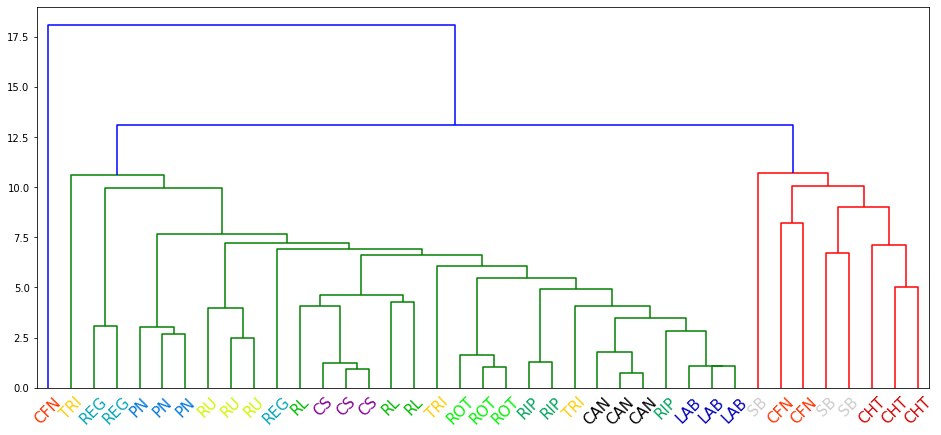

In [33]:
#Measure Euclidean distances
dist_euc_NP_neg = dist.pdist(Euc_NP_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_NP_neg = hier.linkage(dist_euc_NP_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NP_neg, labels=Euc_NP_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [34]:
print(hier.cophenet(Z_euc_NP_neg,dist_euc_NP_neg)[0]) 

0.8866283448501262


In [35]:
#Euc_NGP_neg
glog_neg = sca.glog(Norm_neg, 0)
Euc_NGP_neg = sca.ParetoScal(glog_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling


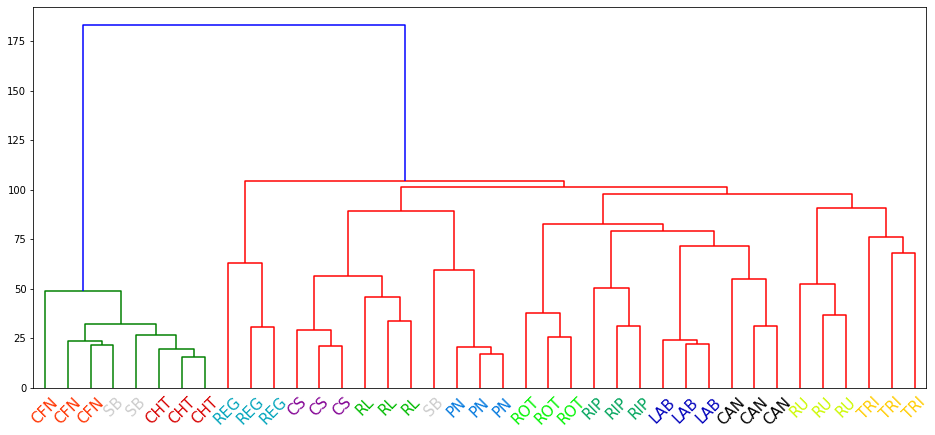

In [36]:
#Measure Euclidean distances
dist_euc_NGP_neg = dist.pdist(Euc_NGP_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_NGP_neg = hier.linkage(dist_euc_NGP_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NGP_neg, labels=Euc_NGP_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [37]:
print(hier.cophenet(Z_euc_NGP_neg,dist_euc_NGP_neg)[0]) 

0.907201350578213


#### Positive Mode - Original peak alignment

3 types of processing:

Euc_P_pos - Missing Value Imputation and Pareto Scaling.

Euc_NP_pos - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_NGP_pos - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [38]:
#Euc_P_pos
Imputated_pos = sca.NaN_Imputation(aligned_all_pos, 0)
Euc_P_pos = sca.ParetoScal(Imputated_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation and Pareto Scaling


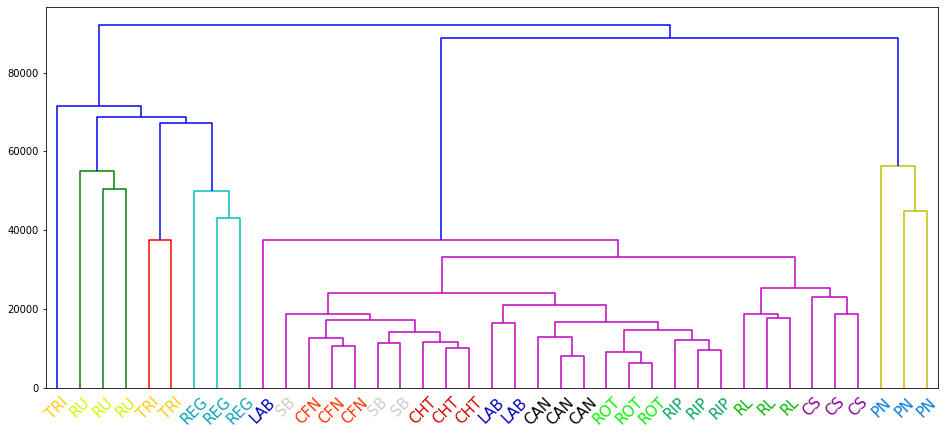

In [39]:
#Measure Euclidean distances
dist_euc_P_pos = dist.pdist(Euc_P_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation and Pareto Scaling')
Z_euc_P_pos = hier.linkage(dist_euc_P_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_P_pos, labels=Euc_P_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [40]:
print(hier.cophenet(Z_euc_P_pos,dist_euc_P_pos)[0])

0.9801271826154482


In [41]:
#Euc_NP_pos
#Theoretical mass for positive mode Leucine Enkephalin - 556.2771.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos, 556.2771)
print(RefEst_Pos)

(556.2765712820513, 0.0005287179486686)


In [42]:
Norm_pos = sca.Norm_Feat(Imputated_pos, 556.2765712820513)
Euc_NP_pos = sca.ParetoScal(Norm_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized and Pareto Scaling


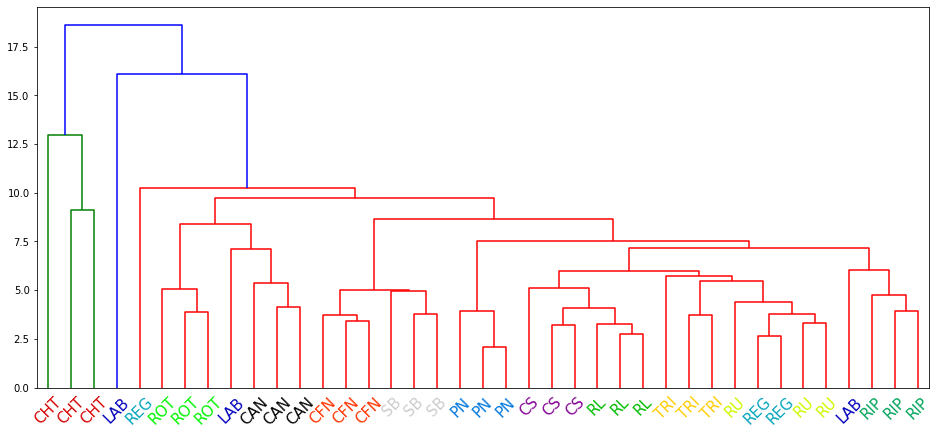

In [43]:
#Measure Euclidean distances
dist_euc_NP_pos = dist.pdist(Euc_NP_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_NP_pos = hier.linkage(dist_euc_NP_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NP_pos, labels=Euc_NP_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [44]:
print(hier.cophenet(Z_euc_NP_pos,dist_euc_NP_pos)[0])

0.8834553769498935


In [45]:
#Euc_NGP_pos
glog_pos = sca.glog(Norm_pos, 0)
Euc_NGP_pos = sca.ParetoScal(glog_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling


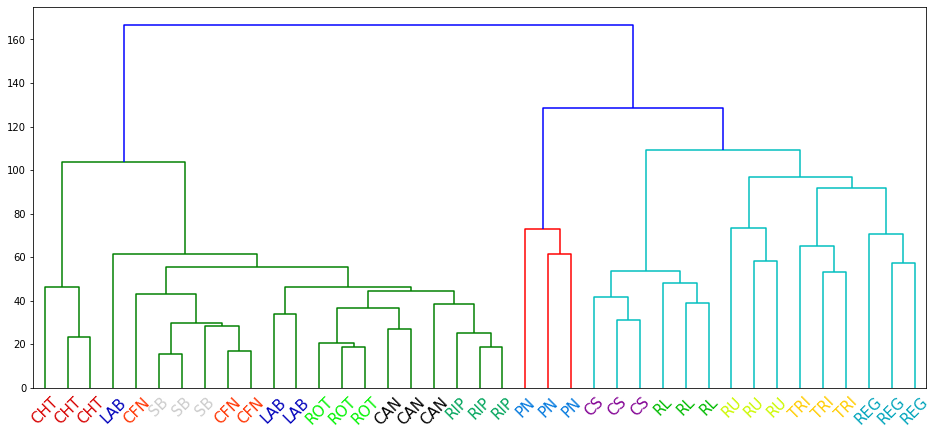

In [46]:
#Measure Euclidean distances
dist_euc_NGP_pos = dist.pdist(Euc_NGP_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_NGP_pos = hier.linkage(dist_euc_NGP_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NGP_pos, labels=Euc_NGP_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [47]:
print(hier.cophenet(Z_euc_NGP_pos,dist_euc_NGP_pos)[0])

0.7975724146805668


## 2nd Peak Alignment - 2-1 (special case)

#### Negative Mode - Peak alignment (1st alignment made with 2 replicates of each variety (between varieties) where a feature must be present in both and 2nd alignment with all samples (including the ones excluded before) with no feature requirement).

Same procedure as before:

3 types of processing:

Euc_P_neg2 (in script, 2-1(S) in figures) - Missing Value Imputation and Pareto Scaling.

Euc_NP_neg2 (in script, 2-1(S) in figures) - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_NGP_neg2 (in script, 2-1(S) in figures) - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [48]:
aligned_all_pos2 = read_aligned_spectra('aligned_1ppm_min2-1_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg2 = read_aligned_spectra('aligned_1ppm_min2-1_1ppm_negative.csv', labels=True, sep=',')

In [49]:
aligned_all_pos2.labels = ['CAN',
 'CAN',
 'CS',
 'CS',
 'LAB',
 'LAB',
 'PN',
 'PN',
 'REG',
 'REG',
 'RIP',
 'RIP',
 'RL',
 'RL',
 'ROT',
 'ROT',
 'RU',
 'RU',
 'TRI',
 'TRI',
 'CFN',
 'CFN',
 'CHT',
 'CHT',
 'SB',
 'SB',
 'CAN2',
 'CS2',
 'LAB2',
 'PN2',
 'REG2',
 'RIP2',
 'RL2',
 'ROT2',
 'RU2',
 'TRI2',
 'CFN2',
 'CHT2',
 'SB2']
aligned_all_neg2.labels = ['CAN',
 'CAN',
 'CS',
 'CS',
 'LAB',
 'LAB',
 'PN',
 'PN',
 'REG',
 'REG',
 'RIP',
 'RIP',
 'RL',
 'RL',
 'ROT',
 'ROT',
 'RU',
 'RU',
 'TRI',
 'TRI',
 'CFN',
 'CFN',
 'CHT',
 'CHT',
 'SB',
 'SB',
 'CAN2',
 'CS2',
 'LAB2',
 'PN2',
 'REG2',
 'RIP2',
 'RL2',
 'ROT2',
 'RU2',
 'TRI2',
 'CFN2',
 'CHT2',
 'SB2']

Order of samples is different so be careful in coloring labels:

In [50]:
for i in range(len(col_lbl)):
    label_colors[aligned_all_neg2.labels[2*i]] = col_lbl[i]
    label_colors[aligned_all_neg2.labels[26+i]] = col_lbl[i]

In [51]:
#Euc_P_neg2
Imputated_neg2 = sca.NaN_Imputation(aligned_all_neg2, 0)
Euc_P_neg2 = sca.ParetoScal(Imputated_neg2)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 2-1, NaN Imputation and Pareto Scaling


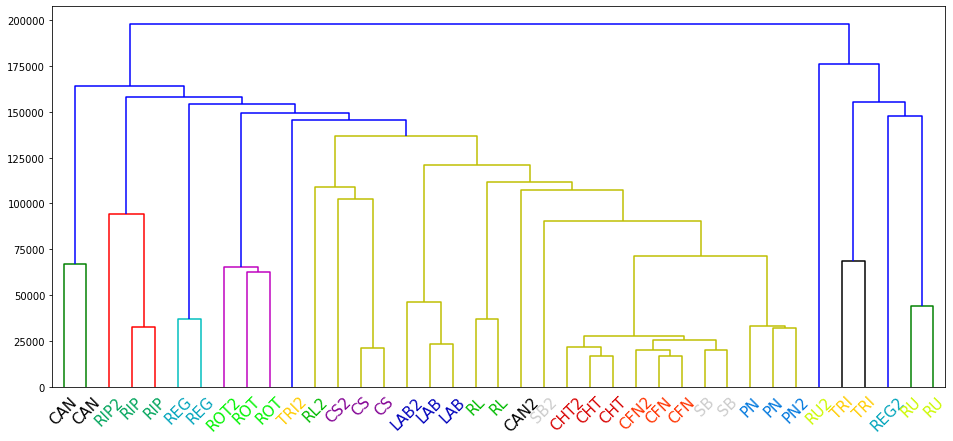

In [52]:
#Measure Euclidean distances
dist_euc_P_neg2 = dist.pdist(Euc_P_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 2-1, NaN Imputation and Pareto Scaling')
Z_euc_P_neg2 = hier.linkage(dist_euc_P_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_P_neg2, labels=Euc_P_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [53]:
print(hier.cophenet(Z_euc_P_neg2,dist_euc_P_neg2)[0]) 

0.9213016304335335


In [54]:
#Euc_NP_neg2
#Theoretical mass for negative mode Leucine Enkephalin - 554.2615.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_neg2, 554.2615)
print(RefEst_Pos) #Same result as previous alignment.
Norm_neg2 = sca.Norm_Feat(Imputated_neg2, 554.26202)
Euc_NP_neg2 = sca.ParetoScal(Norm_neg2)

(554.26202, 0.0005200000000513683)


Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 2-1, NaN Imputation, Normalized and Pareto Scaling


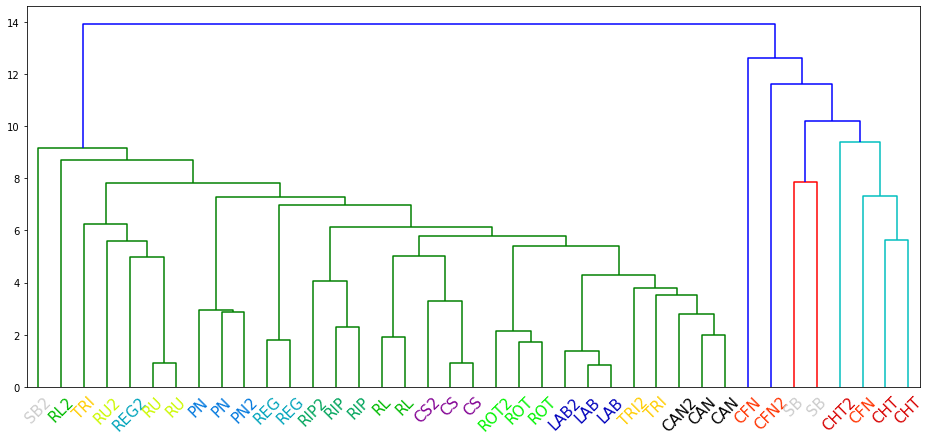

In [55]:
#Measure Euclidean distances
dist_euc_NP_neg2 = dist.pdist(Euc_NP_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 2-1, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_NP_neg2 = hier.linkage(dist_euc_NP_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NP_neg2, labels=Euc_NP_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [56]:
print(hier.cophenet(Z_euc_NP_neg2,dist_euc_NP_neg2)[0])

0.8901945660392525


In [57]:
#Euc_NGP_neg2
glog_neg2 = sca.glog(Norm_neg2, 0)
Euc_NGP_neg2 = sca.ParetoScal(glog_neg2)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 2-1, NaN Imputation, Normalized, Transformed and Pareto Scaling


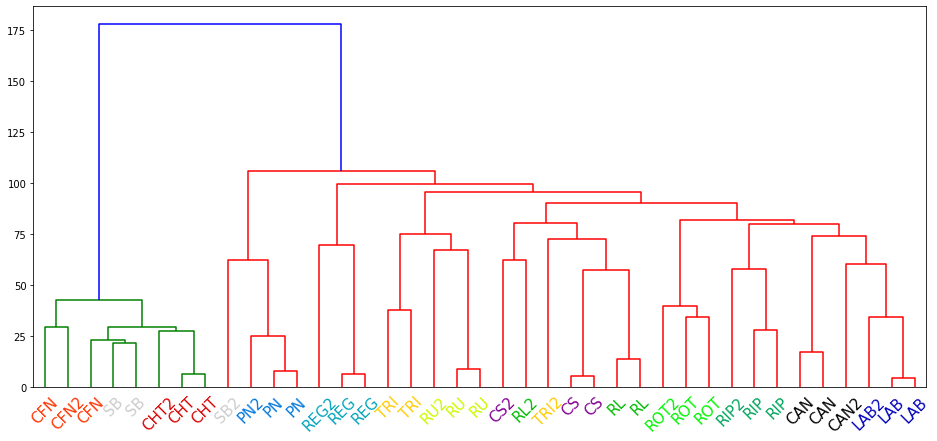

In [58]:
#Measure Euclidean distances
dist_euc_NGP_neg2 = dist.pdist(Euc_NGP_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 2-1, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_NGP_neg2 = hier.linkage(dist_euc_NGP_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NGP_neg2, labels=Euc_NGP_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [59]:
print(hier.cophenet(Z_euc_NGP_neg2,dist_euc_NGP_neg2)[0]) #method average seems to lead to higher coefficients

0.9060887522705819


#### Positive Mode - Peak alignment (1st alignment made with 2 replicates of each variety (between varieties) where a feature must be present in both and 2nd alignment with all samples (including the ones excluded before) with no feature requirement).

Same procedure as before:

3 types of processing:

Euc_P_pos2 (in script, 2-1 in figures) - Missing Value Imputation and Pareto Scaling.

Euc_NP_pos2 (in script, 2-1 in figures) - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_NGP_pos2 (in script, 2-1 in figures) - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling

In [60]:
#Euc_P_pos2
Imputated_pos2 = sca.NaN_Imputation(aligned_all_pos2, 0)
Euc_P_pos2 = sca.ParetoScal(Imputated_pos2)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 2-1, NaN Imputation and Pareto Scaling


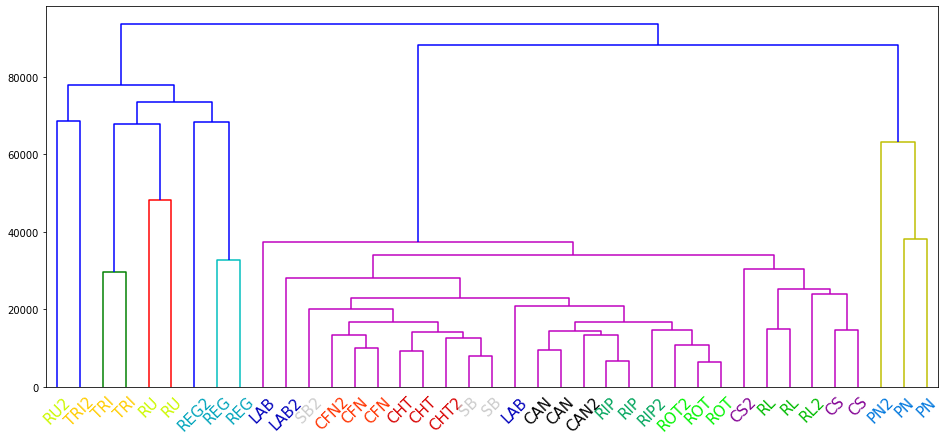

In [61]:
#Measure Euclidean distances
dist_euc_P_pos2 = dist.pdist(Euc_P_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 2-1, NaN Imputation and Pareto Scaling')
Z_euc_P_pos2 = hier.linkage(dist_euc_P_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_P_pos2, labels=Euc_P_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [62]:
print(hier.cophenet(Z_euc_P_pos2,dist_euc_P_pos2)[0])

0.981348519077407


In [63]:
#Euc_NP_pos2
#Theoretical mass for positive mode Leucine Enkephalin - 556.2771.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos2, 556.2771)
print(RefEst_Pos) #Same result as previous alignment.
Norm_pos2 = sca.Norm_Feat(Imputated_pos2, 556.27657115384613)
Euc_NP_pos2 = sca.ParetoScal(Norm_pos2)

(556.2765711538461, 0.0005288461538839329)


Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 2-1, NaN Imputation, Normalized and Pareto Scaling


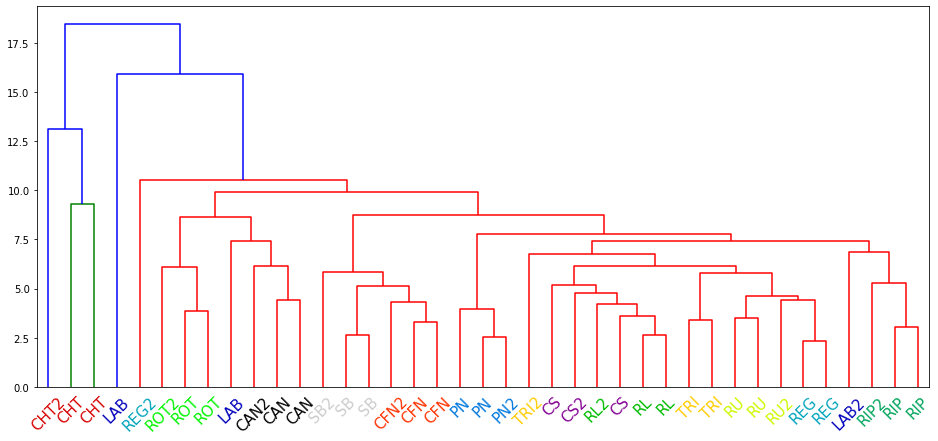

In [64]:
#Measure Euclidean distances
dist_euc_NP_pos2 = dist.pdist(Euc_NP_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 2-1, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_NP_pos2 = hier.linkage(dist_euc_NP_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NP_pos2, labels=Euc_NP_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [65]:
print(hier.cophenet(Z_euc_NP_pos2,dist_euc_NP_pos2)[0])

0.8959483426136579


In [66]:
#Euc_NGP_pos
glog_pos2 = sca.glog(Norm_pos2, 0)
Euc_NGP_pos2 = sca.ParetoScal(glog_pos2)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 2-1, NaN Imputation, Normalized, Transformed and Pareto Scaling


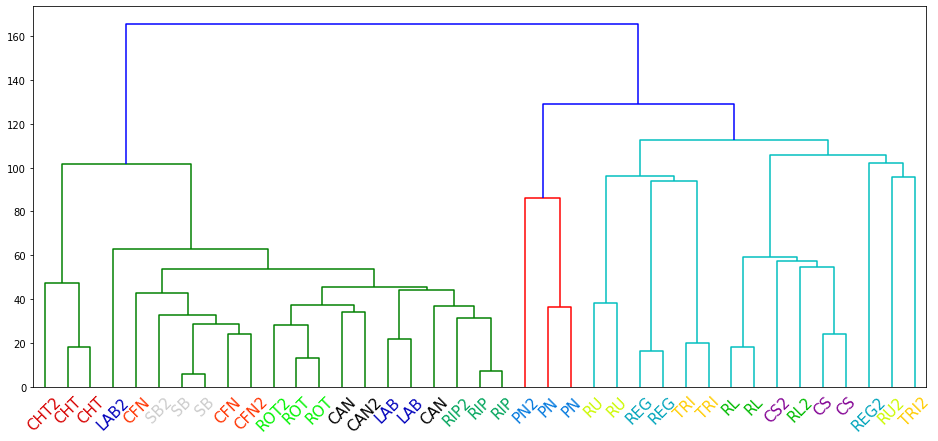

In [67]:
#Measure Euclidean distances
dist_euc_NGP_pos2 = dist.pdist(Euc_NGP_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 2-1, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_NGP_pos2 = hier.linkage(dist_euc_NGP_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_NGP_pos2, labels=Euc_NGP_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [68]:
print(hier.cophenet(Z_euc_NGP_pos2,dist_euc_NGP_pos2)[0])

0.7942747741275227


### Binary distances example for peak_alignment 2: 2-1

In [69]:
aligned_neg2 = df_to_bool(aligned_all_neg2.data)
aligned_pos2 = df_to_bool(aligned_all_pos2.data)

Cultivar dendogram, Binary methods, NEGATIVE MODE, Peak Alignment: 2-1


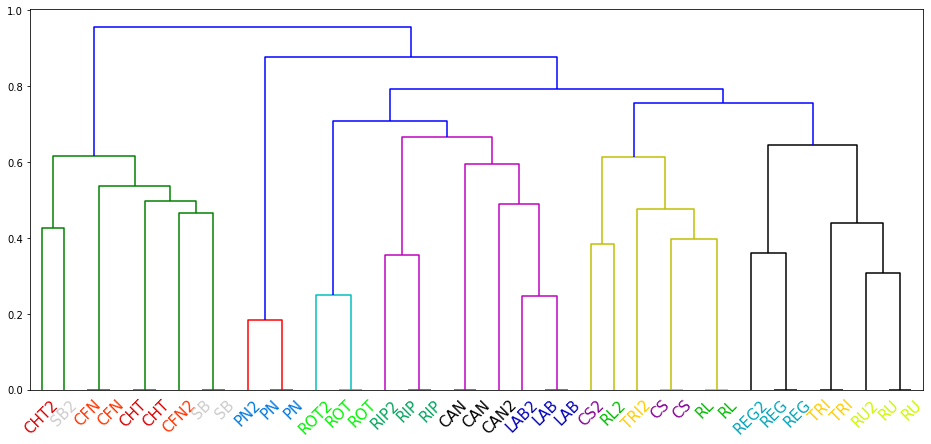

In [70]:
#Apply one of the following:
#dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule
#kulsinski, rusellrao

print('Cultivar dendogram, Binary methods, NEGATIVE MODE, Peak Alignment: 2-1')
Zdice_neg2 = hier.linkage(aligned_neg2.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_neg2, labels=aligned_all_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

Cultivar dendogram, Binary methods, POSITIVE MODE, Peak Alignment: 2-1


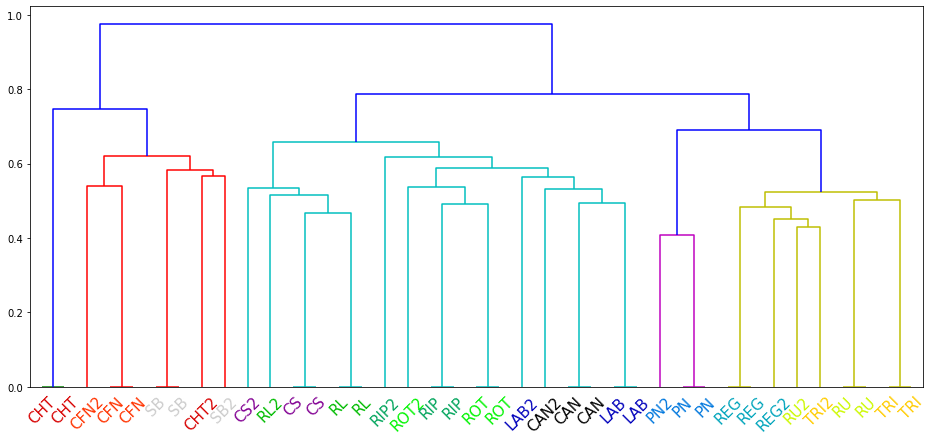

In [71]:
print('Cultivar dendogram, Binary methods, POSITIVE MODE, Peak Alignment: 2-1')
Zdice_pos2 = hier.linkage(aligned_pos2.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_pos2, labels=aligned_all_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

### Comparing Dendrograms - Useless in this case for 2nd peak_alignment - samples in wrong order

#### Two methods so far: Baker's Gamma Correlation and Cophenetic Correlation Coefficient

#### Examples of procedure with these methods

In [72]:
import numpy as np
import scipy.stats as stats
import multianalysis as ma

#### Baker's method

Use of the mergerank function from multianalysis to create a 'rank' of the iteration number two samples were linked to the same cluster.

In [73]:
euclidean = (Z_euc_P_neg, Z_euc_NP_neg, Z_euc_NGP_neg, Z_euc_P_pos, Z_euc_NP_pos, Z_euc_NGP_pos,
            Z_euc_P_neg2, Z_euc_NP_neg2, Z_euc_NGP_neg2, Z_euc_P_pos2, Z_euc_NP_pos2, Z_euc_NGP_pos2)
dist_euclidean = (dist_euc_P_neg, dist_euc_NP_neg, dist_euc_NGP_neg, dist_euc_P_pos, dist_euc_NP_pos, dist_euc_NGP_pos,
                 dist_euc_P_neg2, dist_euc_NP_neg2, dist_euc_NGP_neg2, dist_euc_P_pos2, dist_euc_NP_pos2, dist_euc_NGP_pos2)

K_euc = []
S_euc = []
Coph_euc = []

for i in range(len(euclidean)):
    K_euc.append(ma.mergerank(euclidean[i])) #Mergerank
    S_euc.append(K_euc[i][K_euc[i]!=0]) #Both reshape to a 1D array (needed for spearman correlation) and take out 0's 
    Coph_euc.append(hier.cophenet(euclidean[i], dist_euclidean[i])) #Matrix of Cophenetic distances

#### Examples

According to Original Paper (Stability of Two Hierarchical Grouping Techniques Case 1: Sensitivity to Data Errors)

In [74]:
print('Pair of samples      \tKendall Correlation \tp-value')
print('Euc_P_neg-Euc_NP_neg\t', stats.kendalltau(S_euc[0],S_euc[1])[0], '\t', stats.kendalltau(S_euc[0],S_euc[1])[1])
print('Euc_P_neg-Euc_NGP_neg\t', stats.kendalltau(S_euc[0],S_euc[2])[0], '\t', stats.kendalltau(S_euc[0],S_euc[2])[1])

Pair of samples      	Kendall Correlation 	p-value
Euc_P_neg-Euc_NP_neg	 0.008910399112678775 	 0.6443850761227088
Euc_P_neg-Euc_NGP_neg	 0.10839742231026103 	 3.835245645295581e-08


According to the explanation given in the R package dendextend

In [75]:
print('Pair of samples      \tSpearman Correlation \tp-value')
print('Euc_P_neg-Euc_NP_neg\t', stats.spearmanr(S_euc[0],S_euc[1])[0], '\t', stats.spearmanr(S_euc[0],S_euc[1])[1])
print('Euc_P_neg-Euc_NGP_neg\t', stats.spearmanr(S_euc[0],S_euc[2])[0], '\t', stats.spearmanr(S_euc[0],S_euc[2])[1])

Pair of samples      	Spearman Correlation 	p-value
Euc_P_neg-Euc_NP_neg	 -0.01557548763503229 	 0.5490821254802851
Euc_P_neg-Euc_NGP_neg	 0.12926679353867315 	 5.941307702666646e-07


#### Cophenetic Correlation Coefficient

In [76]:
#Acho que se pode aplicar logo a função np.corrcoef visto os elementos que vêm da função cophenet estão sempre na mesma ordem 
#uns em relação aos outros.

In [77]:
print('Pair of samples      \tPearson Correlation \tp-value')
print('Euc_P_neg-Euc_NP_neg\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[1][1])[0], '\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[1][1])[1])
print('Euc_P_neg-Euc_NGP_neg\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[2][1])[0], '\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[2][1])[1])

Pair of samples      	Pearson Correlation 	p-value
Euc_P_neg-Euc_NP_neg	 0.01886183156068998 	 0.6082152998757421
Euc_P_neg-Euc_NGP_neg	 0.16050307464101154 	 1.1323510379285296e-05


### Comparison of dendrograms made with all binary metrics and euclidean distances 

#### Correlations between all pairs using all 3 methods

In [78]:
#9 binary methods accepted in pdist (scipy.spatial.distances.pdist)
binary = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 'yule', 'kulsinski', 'russellrao')

In [79]:
#Application of all "single" steps needed presented in the examples above with every distance metric.
#Negative mode
Z_neg = []
K_neg = []
S_neg = []
Coph_neg = []

for i in range(len(binary)):
    Z_neg.append(hier.linkage(aligned_neg.T, metric = binary[i], method='average')) #Z
    K_neg.append(ma.mergerank(Z_neg[i])) #Mergerank
    S_neg.append(K_neg[i][K_neg[i]!=0]) #Eliminating 0's
    Coph_neg.append(hier.cophenet(Z_neg[i], dist.pdist(aligned_neg.T, metric = binary[i]))) #Cophenetic

In [80]:
#Positive Mode
Z_pos = []
K_pos = []
S_pos = []
Coph_pos = []

for i in range(len(binary)):
    Z_pos.append(hier.linkage(aligned_pos.T, metric = binary[i], method='average')) #Z
    K_pos.append(ma.mergerank(Z_pos[i])) #Mergerank
    S_pos.append(K_pos[i][K_pos[i]!=0]) #Eliminating 0's
    Coph_pos.append(hier.cophenet(Z_pos[i], dist.pdist(aligned_pos.T, metric = binary[i]))) #Cophenetic

In [81]:
#Creation of a list with all the "rank" values (in order) for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
S = []
S.extend(S_euc)
S.extend(S_neg)
S.extend(S_pos)
#Creation of a list with all the returns from the function cophenetic for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
Coph = []
Coph.extend(Coph_euc)
Coph.extend(Coph_neg)
Coph.extend(Coph_pos)

Creation of all dataframes needed to store all correlation coeficients and respective p-values fot all three methods

In [82]:
#Column names and row names for the dataframes
colnames = ['euc_P_neg2_1', 'euc_NP_neg2_1', 'euc_NGP_neg2_1', 'euc_P_pos2_1', 'euc_NP_pos2_1', 'euc_NGP_pos2_1','euc_P_neg3_3',
            'euc_NP_neg2_1(S)', 'euc_NGP_neg2_1(S)', 'euc_P_pos2_1(S)', 'euc_NP_pos2_1(S)', 'euc_NGP_pos2_1(S)','dice_neg2_1', 
            'hamming_neg2_1','jaccard_neg2_1', 'rogerstanimoto_neg2_1', 'sokalmichener_neg2_1', 'sokalsneath_neg2_1',
            'yule_neg2_1', 'kulsinski_neg2_1', 'russellrao_neg2_1','dice_pos2_1', 'hamming_pos2_1', 'jaccard_pos2_1', 
            'rogerstanimoto_pos2_1', 'sokalmichener_pos2_1', 'sokalsneath_pos2_1', 'yule_pos2_1', 'kulsinski_pos2_1', 
            'russellrao_pos2_1']

In [83]:
df_K = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #K - Kendall (Baker)
df_S = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #S - Spearman (Baker)
df_C = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #C - Cophenetic Correlation
df_K_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of K method
df_S_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of S method
df_C_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of C method

In [84]:
#Calculation of correlation coefficient for each method
for i in range(len(S)):
    for j in range(len(S)):
        df_K.iloc[i,j] = stats.kendalltau(S[i],S[j])[0] #Correlation coefficient
        df_S.iloc[i,j] = stats.spearmanr(S[i],S[j])[0] #Correlation coefficient
        df_C.iloc[i,j] = stats.pearsonr(Coph[i][1],Coph[j][1])[0] #Correlation coefficient
        df_K_p.iloc[i,j] = stats.kendalltau(S[i],S[j])[1] #p-value
        df_S_p.iloc[i,j] = stats.spearmanr(S[i],S[j])[1] #p-value
        df_C_p.iloc[i,j] = stats.pearsonr(Coph[i][1],Coph[j][1])[1] #p-value

### Heatmaps of the correlation coeficients for the 3 methods

Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc2_1(S) - Peak alignment (special case) explained before.


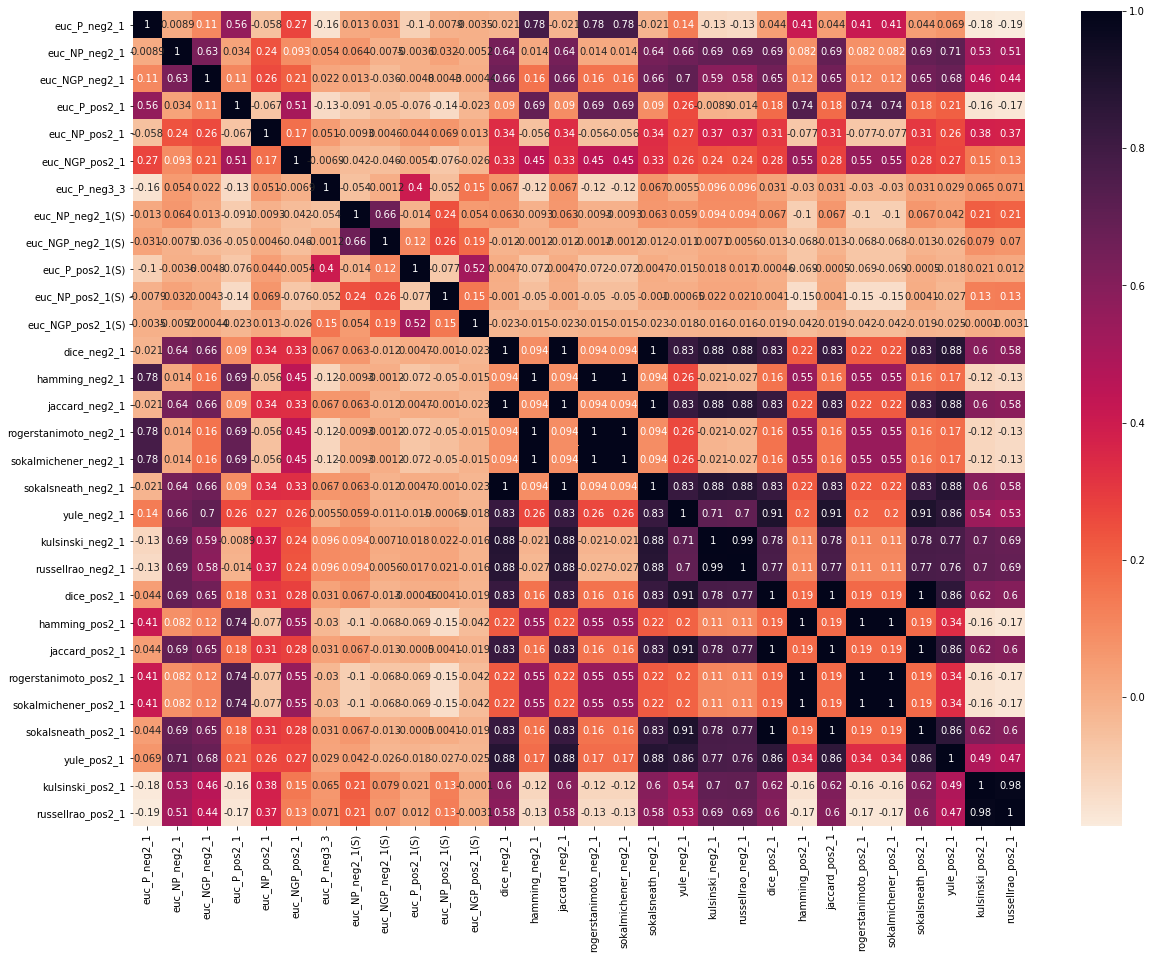

In [85]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc2_1(S) - Peak alignment (special case) explained before.')
hm = sns.heatmap(df_K, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [86]:
Kendall = pd.DataFrame(np.zeros((9, 5)), index = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 
                                                 'yule', 'kulsinski', 'russellrao'), columns = ('neg2_1', 'pos2_1', 'neg2_1(S)',
                                                                                                'pos2_1(S)', 'neg+pos'))

for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Kendall.iloc[r,j] = sum(df_K.iloc[12+r,j*3:j*3+3])
        elif j in [1,3]:
            Kendall.iloc[r,j] = sum(df_K.iloc[21+r,j*3:j*3+3])
        else:
            Kendall.iloc[r,j] = sum(Kendall.iloc[r,0:4])
#print(Kendall)

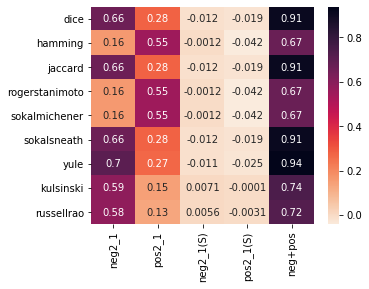

In [87]:
for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Kendall.iloc[r,j] = df_K.iloc[12+r,j*3+2]#sum(df_C.iloc[12+r,j*3+2])j*3:j*3+3])
        elif j in [1,3]:
            Kendall.iloc[r,j] = df_K.iloc[21+r,j*3+2]#sum(df_C.iloc[21+r,j*3+2])j*3:j*3+3])
        else:
            Kendall.iloc[r,j] = sum(Kendall.iloc[r,0:4])
f, ax = plt.subplots(figsize=(5, 4))
hm = sns.heatmap(Kendall, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc2_1(S) - Peak alignment (special case) explained before.


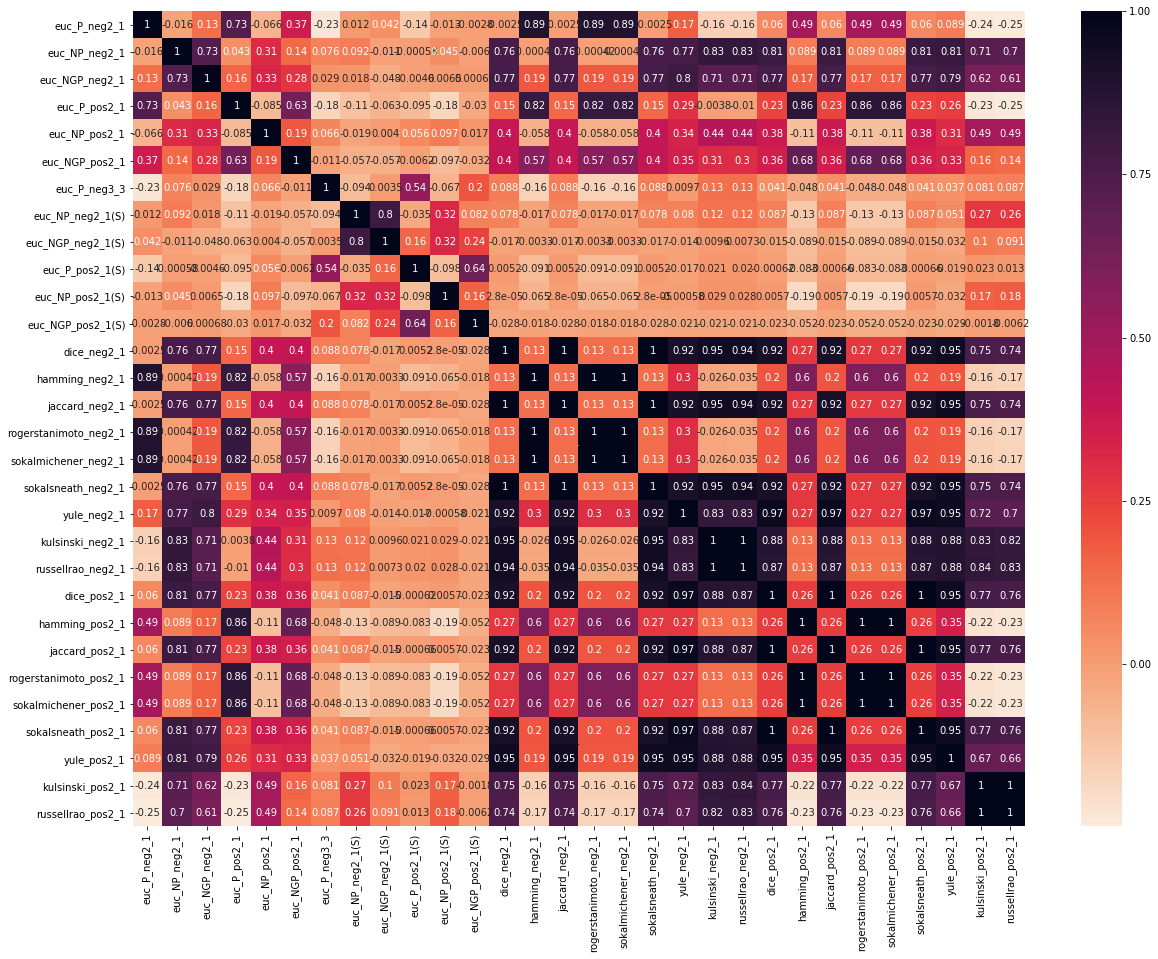

In [88]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc2_1(S) - Peak alignment (special case) explained before.')
hm = sns.heatmap(df_S, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc2_1(S) - Peak alignment (special case) explained before.


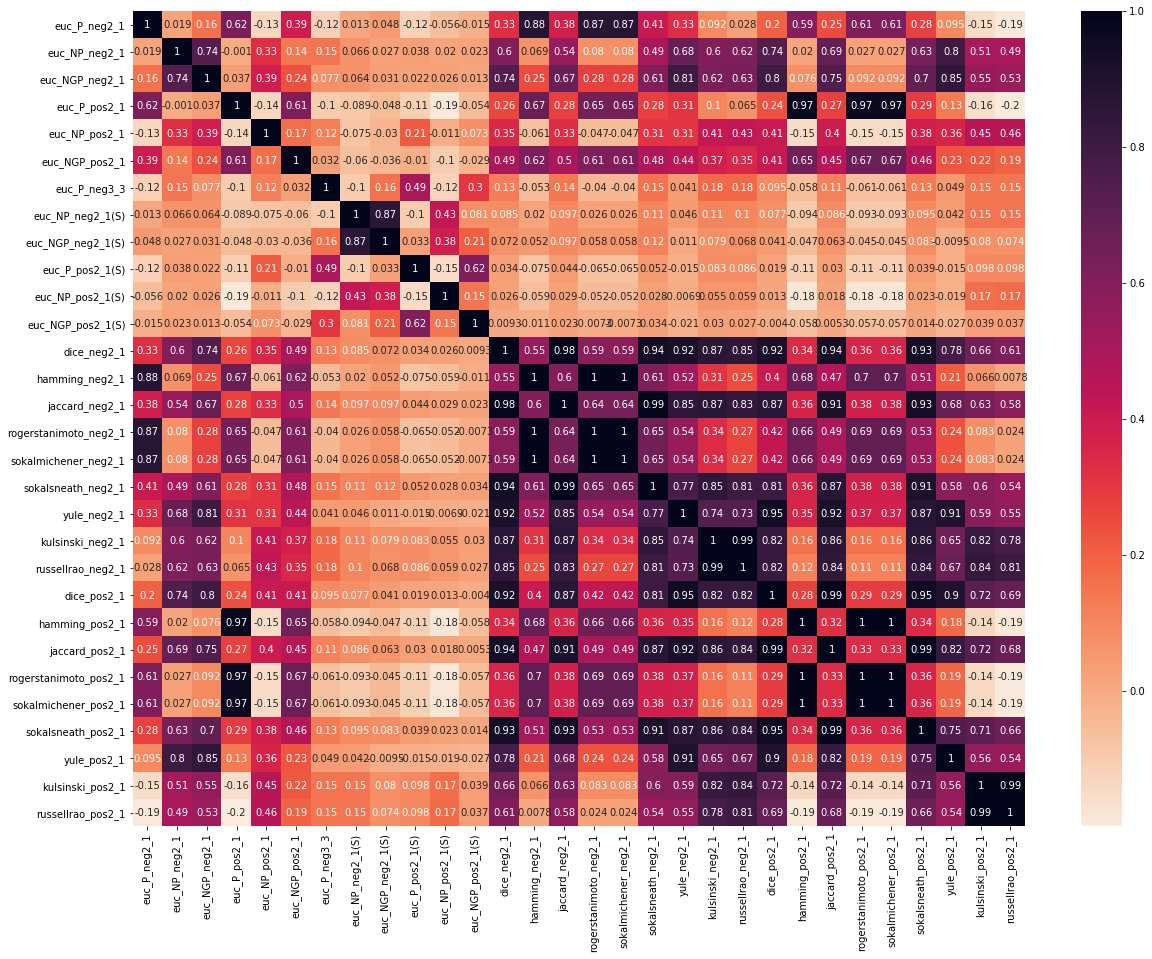

In [89]:
f, ax = plt.subplots(figsize=(20, 15))

print('Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc2_1(S) - Peak alignment (special case) explained before.')
hm = sns.heatmap(df_C, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [90]:
Cophenetic = pd.DataFrame(np.zeros((9, 5)), index = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 
                                                 'yule', 'kulsinski', 'russellrao'), columns = ('neg2_1', 'pos2_1', 'neg2_1(S)',
                                                                                                'pos2_1(S)', 'neg+pos'))

for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Cophenetic.iloc[r,j] = sum(df_C.iloc[12+r,j*3:j*3+3])
        elif j in [1,3]:
            Cophenetic.iloc[r,j] = sum(df_C.iloc[21+r,j*3:j*3+3])
        else:
            Cophenetic.iloc[r,j] = sum(Cophenetic.iloc[r,0:4])
#print(Cophenetic)

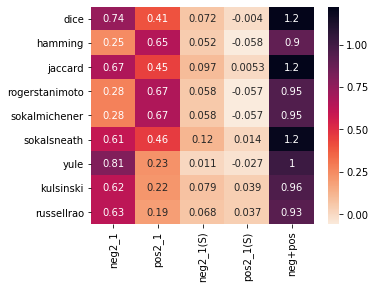

In [91]:
for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Cophenetic.iloc[r,j] = df_C.iloc[12+r,j*3+2]#sum(df_C.iloc[12+r,j*3+2])j*3:j*3+3])
        elif j in [1,3]:
            Cophenetic.iloc[r,j] = df_C.iloc[21+r,j*3+2]#sum(df_C.iloc[21+r,j*3+2])j*3:j*3+3])
        else:
            Cophenetic.iloc[r,j] = sum(Cophenetic.iloc[r,0:4])
f, ax = plt.subplots(figsize=(5, 4))
hm = sns.heatmap(Cophenetic, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Hierarchical clustering of the correlation coeficients of dendrograms made with different distance metrics with each other

Colours for these labels (groups: neg_peakalignment1, pos_peakalignment1, neg_peakalignment2, pos_peakalignment2, neg_binary, pos_binary

In [92]:
label_colors2 = {}
colours2 = cm.get_cmap('nipy_spectral', 6)
col_lbl2 = colours2(range(6))
for i in range(4):
    label_colors2[df_K.columns[3*i]] = col_lbl2[i]
    label_colors2[df_K.columns[3*i+1]] = col_lbl2[i]
    label_colors2[df_K.columns[3*i+2]] = col_lbl2[i]
for i in range(9):
    label_colors2[df_K.columns[12+i]] = col_lbl2[4]
    label_colors2[df_K.columns[21+i]] = col_lbl2[5]

Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc2_1(S) - Peak alignment (special case) explained before.


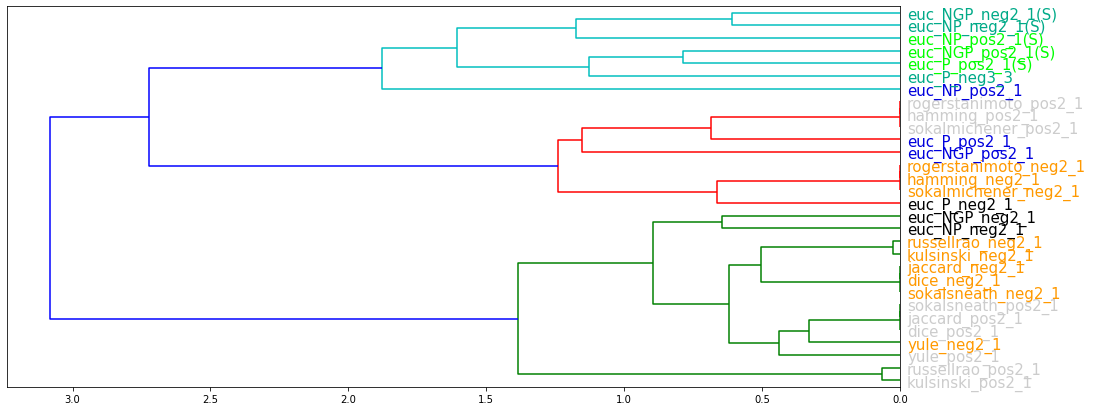

In [93]:
print('Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc2_1(S) - Peak alignment (special case) explained before.')
Z_K = hier.linkage(df_K, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_K, labels=df_K.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc2_1(S) - Peak alignment (special case) explained before.


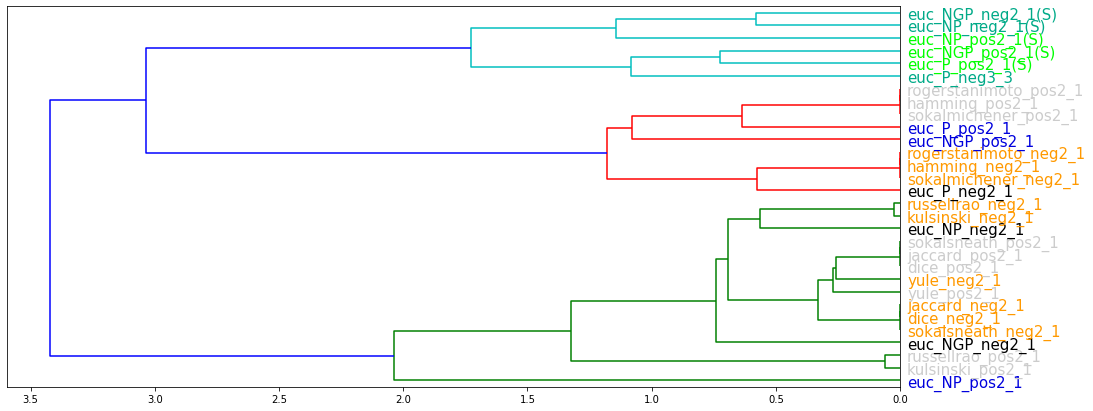

In [94]:
print('Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc2_1(S) - Peak alignment (special case) explained before.')
Z_S = hier.linkage(df_S, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_S, labels=df_S.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
Euc2_1(S) - Peak alignment (special case) explained before.


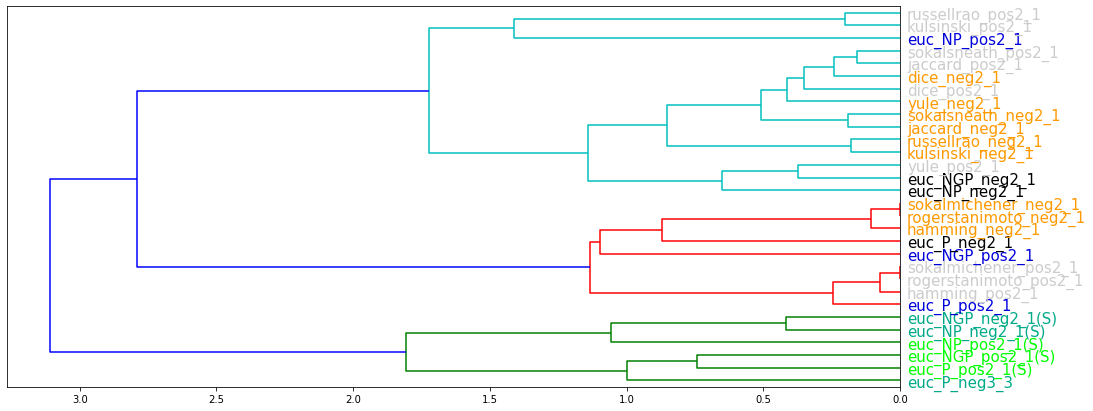

In [95]:
print('Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('Euc2_1(S) - Peak alignment (special case) explained before.')
Z_C = hier.linkage(df_C, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_C, labels=df_C.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

In [96]:
aligned_all_pos2.labels = ['CAN',
 'CAN',
 'CS',
 'CS',
 'LAB',
 'LAB',
 'PN',
 'PN',
 'REG',
 'REG',
 'RIP',
 'RIP',
 'RL',
 'RL',
 'ROT',
 'ROT',
 'RU',
 'RU',
 'TRI',
 'TRI',
 'CFN',
 'CFN',
 'CHT',
 'CHT',
 'SB',
 'SB',
 'CAN',
 'CS',
 'LAB',
 'PN',
 'REG',
 'RIP',
 'RL',
 'ROT',
 'RU',
 'TRI',
 'CFN',
 'CHT',
 'SB']
aligned_all_neg2.labels = ['CAN',
 'CAN',
 'CS',
 'CS',
 'LAB',
 'LAB',
 'PN',
 'PN',
 'REG',
 'REG',
 'RIP',
 'RIP',
 'RL',
 'RL',
 'ROT',
 'ROT',
 'RU',
 'RU',
 'TRI',
 'TRI',
 'CFN',
 'CFN',
 'CHT',
 'CHT',
 'SB',
 'SB',
 'CAN',
 'CS',
 'LAB',
 'PN',
 'REG',
 'RIP',
 'RL',
 'ROT',
 'RU',
 'TRI',
 'CFN',
 'CHT',
 'SB']

### Distance discrimination of all methods applied (and shown in previous heatmap/dendrogram).

In [97]:
#Preparing Z linkage matrices
Z = []
Z.extend(euclidean)
Z.extend(Z_neg)
Z.extend(Z_pos)

In [98]:
disc_average = np.zeros((1,30))
disc_median = np.zeros((1,30))
disc_correct = np.zeros((1,30))
for i in range(len(Z)):
    if i in [6,7,8,9,10,11]:
        discrim = sca.dist_discrim(aligned_all_neg2, Z[i], 3, method = 'average')  #all samples have the same order
        disc_average[0,i] = discrim[0]
        disc_median[0,i] = sca.dist_discrim(aligned_all_neg2, Z[i], 3, 'median')[0] #all samples have the same order
        correct = np.array(list(discrim[1].values()))
        disc_correct[0,i] = len(correct[correct>0])
    else:
        discrim = sca.dist_discrim(aligned_all_neg, Z[i], 3, method = 'average')  #all samples have the same order
        disc_average[0,i] = discrim[0]
        disc_median[0,i] = sca.dist_discrim(aligned_all_neg, Z[i], 3, 'median')[0] #all samples have the same order
        correct = np.array(list(discrim[1].values()))
        disc_correct[0,i] = len(correct[correct>0])

disc_average = pd.DataFrame(disc_average, index = ['distances average'], columns = colnames)
disc_median = pd.DataFrame(disc_median, index = ['distances median'], columns = colnames)
disc_correct = pd.DataFrame(disc_correct, index = ['correct groupings'], columns = colnames)

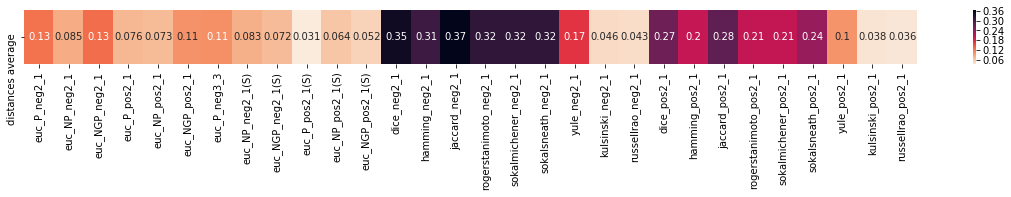

In [99]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_average, annot=True, ax=ax, cmap = sns.cm.rocket_r)

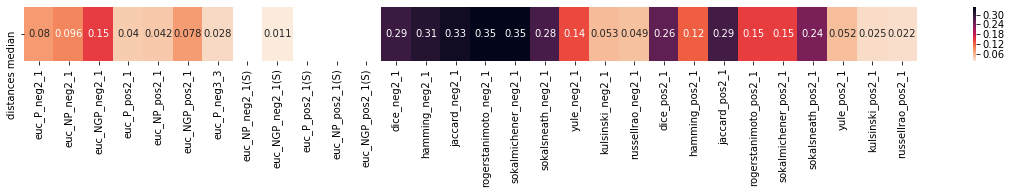

In [100]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_median, annot=True, ax=ax, cmap = sns.cm.rocket_r)

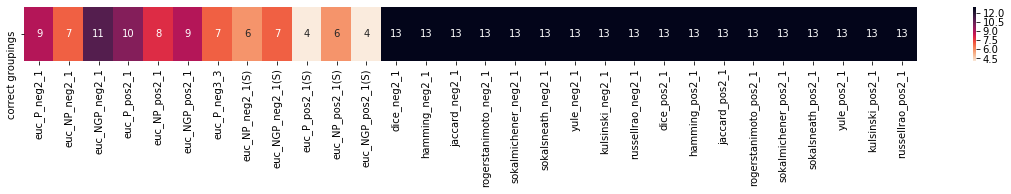

In [101]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_correct, annot=True, ax=ax, cmap = sns.cm.rocket_r)

### Results summary of dendrograms made with the heatmaps

- See original similarity_analysis. (The discussion of the other peak_alignments aren't written in-depth).

### Extra binary measures of peak alignment 2: 2-1

In [102]:
sim_pos = mz_similarity(aligned_all_pos2)
sim_neg = mz_similarity(aligned_all_neg2)

In [103]:
dfpos = pd.DataFrame(sim_pos.sample_similarity_jaccard,
                     columns=sim_pos.sample_names,
                     index=sim_pos.sample_names)

dfneg = pd.DataFrame(sim_neg.sample_similarity_jaccard,
                     columns=sim_neg.sample_names,
                     index=sim_neg.sample_names)

Sample similarity, positive mode, Peak Alignment: 2-1


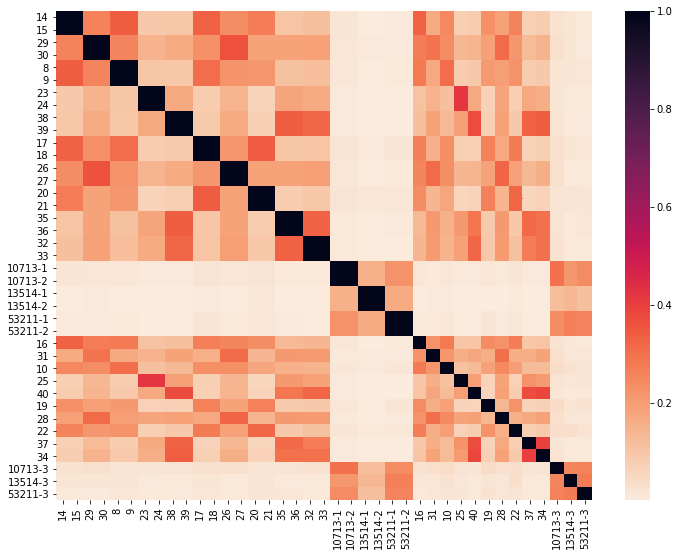

In [104]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, positive mode, Peak Alignment: 2-1')
hm = sns.heatmap(dfpos, annot=False, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Sample similarity, negative mode, Peak Alignment: 2-1


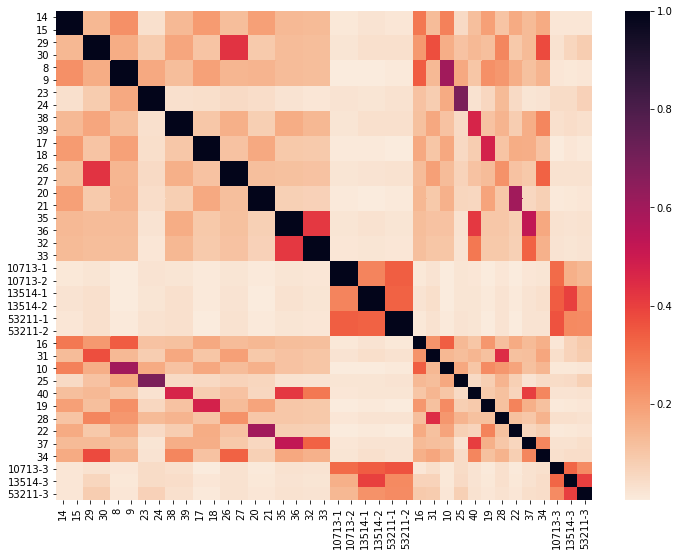

In [105]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, negative mode, Peak Alignment: 2-1')
hm = sns.heatmap(dfneg, annot=False, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Sample HC, NEGATIVE mode, Peak Alignment: 2-1


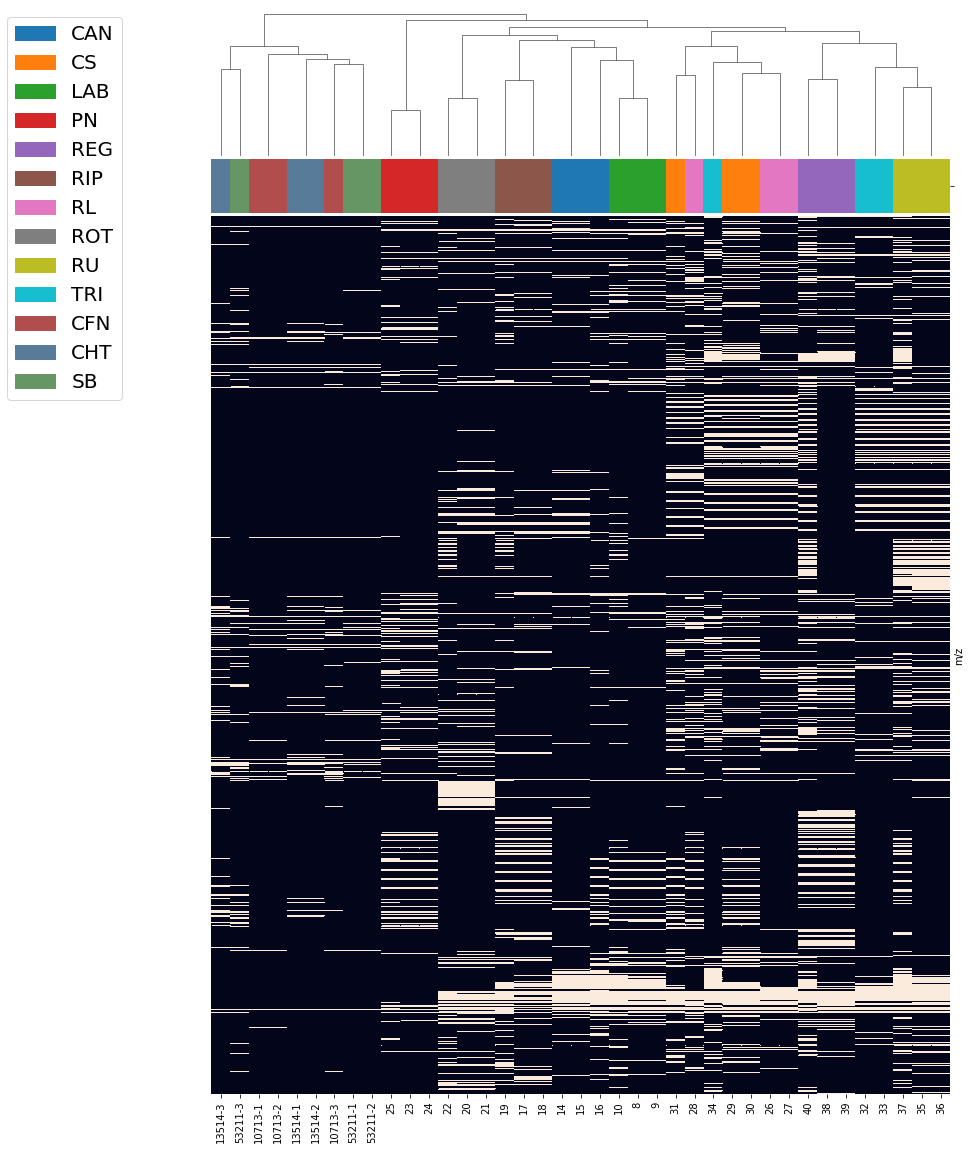

In [106]:
print('Sample HC, NEGATIVE mode, Peak Alignment: 2-1')
g = clustermap_peak_list(aligned_all_neg2)

Sample HC, POSITIVE mode, Peak Alignment: 2-1


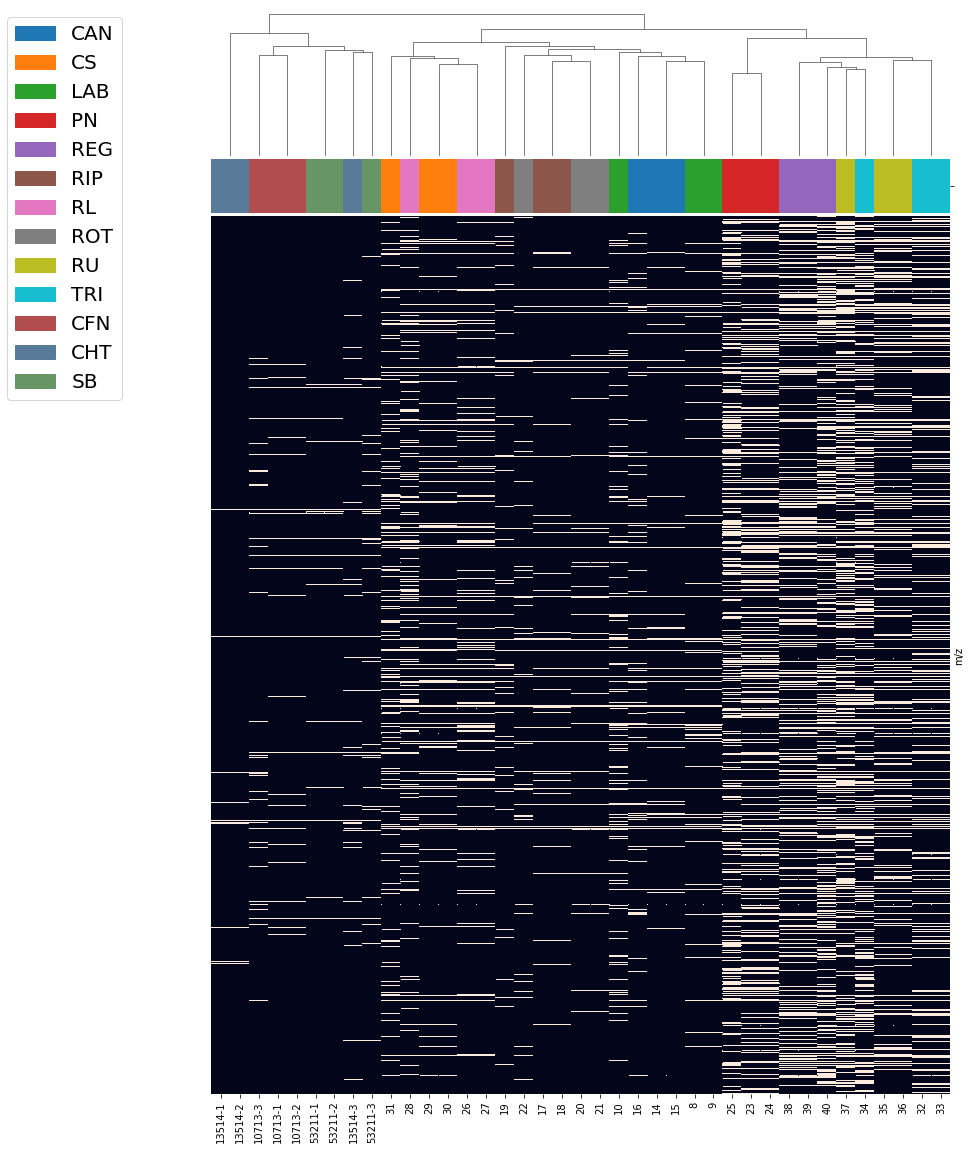

In [107]:
print('Sample HC, POSITIVE mode, Peak Alignment: 2-1')
g = clustermap_peak_list(aligned_all_pos2)

### K-means clustering

In [108]:
import sklearn.cluster as skclust

#### Example of what happens in a K-means clustering and how samples are separated 
Use of the module do sci-kit learn - sklearn. Cluster number equal to the amount of varieties. How well can this method separate the varieties. Default parameters except number of clusters.

This example doesn't necessarily mirror the results below (for the case in example) since K-means clustering has an intrinsically random side to it and the clustering is performed again for the case example.

In [109]:
Kmean = skclust.KMeans(n_clusters=13)

In [110]:
a = Kmean.fit(Euc_NGP_neg.data.T)

In [111]:
dicto = {}
for i in range(len(a.labels_)):
    if a.labels_[i] in dicto:
        dicto[a.labels_[i]].append(aligned_all_neg.labels[i])
    else:
        dicto[a.labels_[i]] = [aligned_all_neg.labels[i]]
dicto

{5: ['CAN', 'CAN', 'CAN'],
 9: ['CS', 'CS', 'CS'],
 2: ['LAB', 'LAB', 'LAB'],
 7: ['PN', 'PN', 'PN'],
 3: ['REG', 'REG', 'REG'],
 6: ['RIP', 'RIP', 'RIP'],
 0: ['RL', 'RL', 'RL'],
 10: ['ROT', 'ROT', 'ROT'],
 4: ['RU', 'RU', 'RU'],
 8: ['TRI', 'TRI'],
 11: ['TRI'],
 1: ['CFN', 'CFN', 'CFN', 'CHT', 'CHT', 'CHT', 'SB', 'SB'],
 12: ['SB']}

### K-means clustering applied to all euclidean methods and the binary matrixes built

To try and get a condensed and more easily digestible version of the results, a method similar to the discrimination distance performed in the hierarchical clustering was made. The same metrics as before are used.

Replicates of a variety can be together in a cluster but, if there are more samples in the same cluster, its "discrimination distance" is still zero. Therefore, this method is harsher than the original dist_discrim method. The distance is calculated as the distance between the centroid of the cluster where the samples are and the closest centroid. This distance is normalized by dividing it by the maximum distance between any 2 centroids of the clusters formed. The mean/median of the discrimination distances of all groups is then a measure of the global discrimination distance

Use of the Kmeans_discrim function from multianalysis to calculate discrimination distance.

In [112]:
aligned_neg2 = df_to_bool(aligned_all_neg2.data)
aligned_pos2 = df_to_bool(aligned_all_pos2.data)

In [113]:
colnames2 = ['euc_P_neg2_1', 'euc_NP_neg2_1', 'euc_NGP_neg2_1', 'euc_P_pos2_1', 'euc_NP_pos2_1', 'euc_NGP_pos2_1',
             'euc_P_neg2_1(S)', 'euc_NP_neg2_1(S)', 'euc_NGP_neg2_1(S)', 'euc_P_pos2_1(S)', 'euc_NP_pos2_1(S)', 
             'euc_NGP_pos2_1(S)','aligned_neg2_1', 'aligned_pos2_1','aligned_neg2_1(S)', 'aligned_pos2_1(S)']

In [114]:
euclidean = (Euc_P_neg, Euc_NP_neg, Euc_NGP_neg, Euc_P_pos, Euc_NP_pos, Euc_NGP_pos,
            Euc_P_neg2, Euc_NP_neg2, Euc_NGP_neg2, Euc_P_pos2, Euc_NP_pos2, Euc_NGP_pos2)#, 
binaries = (aligned_neg, aligned_pos, aligned_neg2, aligned_pos2)

In [115]:
from metabolinks import AlignedSpectra

In [116]:
disc_average = np.zeros((1,16))
disc_median = np.zeros((1,16))
disc_correct = np.zeros((1,16))
for i in range(len(euclidean)):
    discrim = ma.Kmeans_discrim(euclidean[i], 3, method = 'average')  #all samples have the same order
    disc_average[0,i] = discrim[0]
    disc_median[0,i] = ma.Kmeans_discrim(euclidean[i], 3, method = 'median')[0] #all samples have the same order
    correct = np.array(list(discrim[1].values()))
    disc_correct[0,i] = len(correct[correct>0])
for i in range(len(binaries)):
    discrim = ma.Kmeans_discrim(AlignedSpectra(binaries[i], labels = aligned_all_neg.labels), 3, method = 'average')
    disc_average[0,12 + i] 
    disc_average[0,12 + i] = discrim[0]
    disc_median[0,12 + i] = ma.Kmeans_discrim(AlignedSpectra(binaries[i], labels = aligned_all_neg.labels), 3, method = 'median')[0] 
    correct = np.array(list(discrim[1].values()))
    disc_correct[0,12 + i] = len(correct[correct>0])

disc_average = pd.DataFrame(disc_average, index = ['distances average'], columns = colnames2)
disc_median = pd.DataFrame(disc_median, index = ['distances median'], columns = colnames2)
disc_correct = pd.DataFrame(disc_correct, index = ['correct groupings'], columns = colnames2)

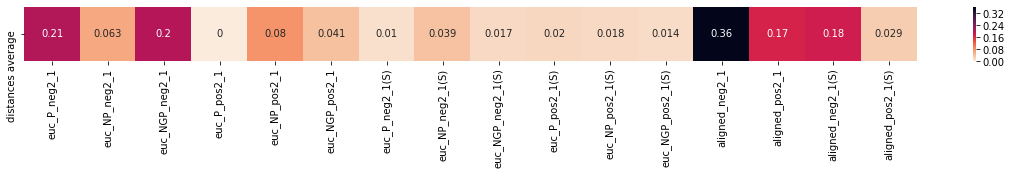

In [117]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_average, annot=True, ax=ax, cmap = sns.cm.rocket_r)

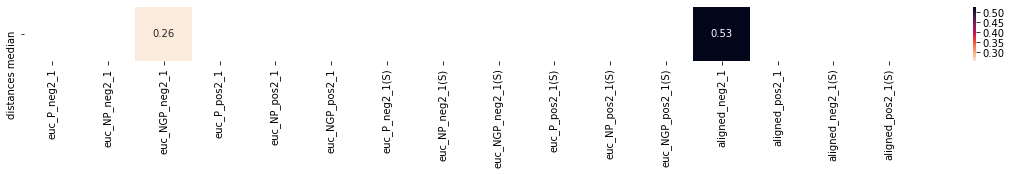

In [118]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_median, annot=True, ax=ax, cmap = sns.cm.rocket_r)

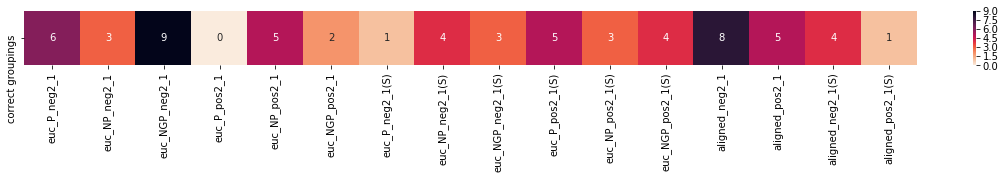

In [119]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_correct, annot=True, ax=ax, cmap = sns.cm.rocket_r)